Global Optimized LumberJack Environment Motor for For_Ex
LumberJack Jyss 5781(c)
 °0Oo_D.A.G._26_oO0°
  --- Golem FX #v1.6 --- 

Ticker :  EUR/USD 
 


__________________________________
|   | Entrez le mode désiré      |
|___|____________________________|
| 1 | Initialisation de la base  |
|___|____________________________|
| 2 | MAJ de la base existante   |
|___|____________________________|
| 3 | Changement des paramètres  |
|___|____________________________|
| 4 | Deep Learning              |
|___|____________________________|
| 5 | Backtest                   |
|___|____________________________|
| 6 | Traitement Statistique     |
|___|____________________________|
| 7 | Live                       |
|___|____________________________|
| 8 | Backtest sur Live          |
|___|____________________________|
| 9 | Harmonic BT  1 ticker      |
|___|____________________________|




Enter ticker


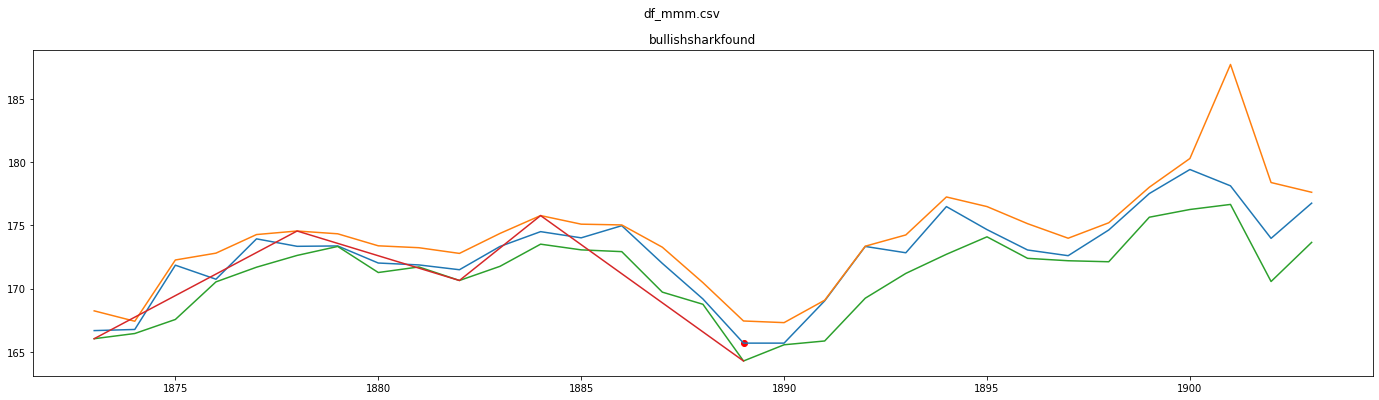

[1873, 1878, 1882, 1884, 1889] 1889


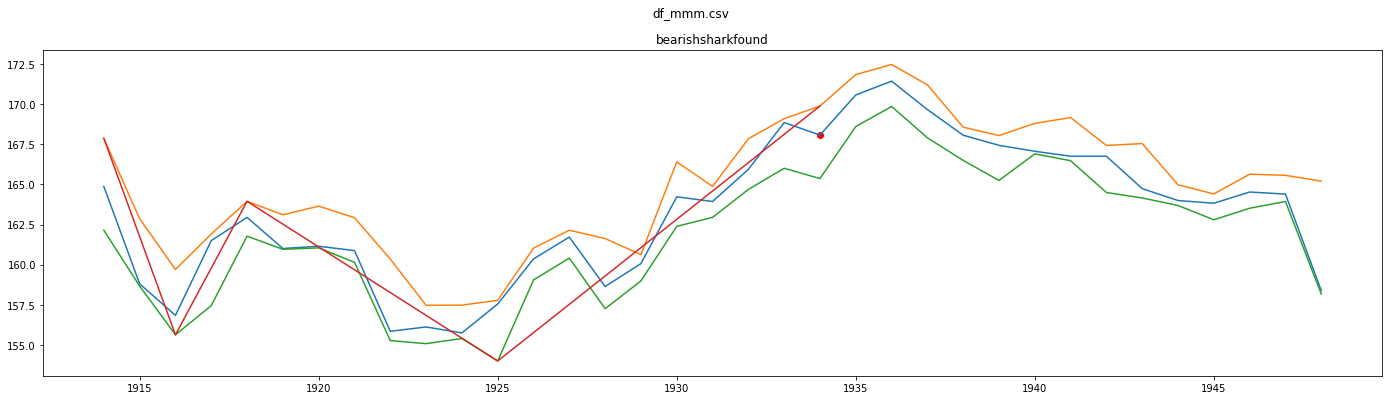

[1914, 1916, 1918, 1925, 1934] 1934


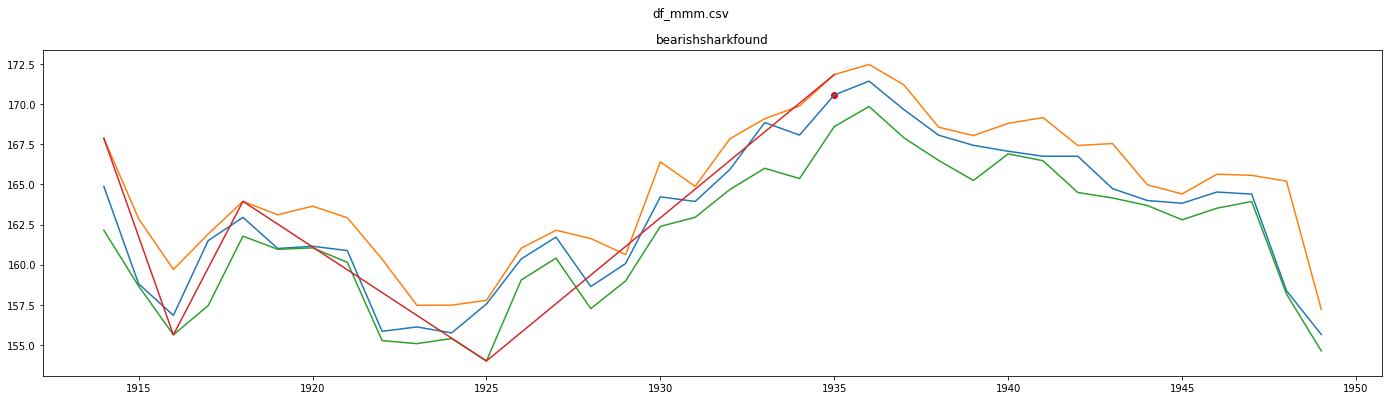

[1914, 1916, 1918, 1925, 1935] 1935


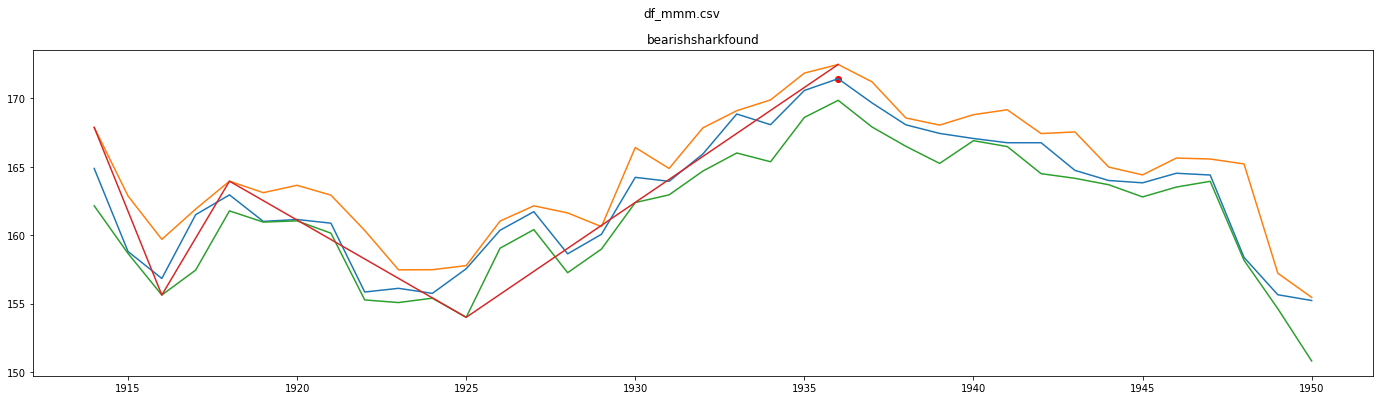

[1914, 1916, 1918, 1925, 1936] 1936


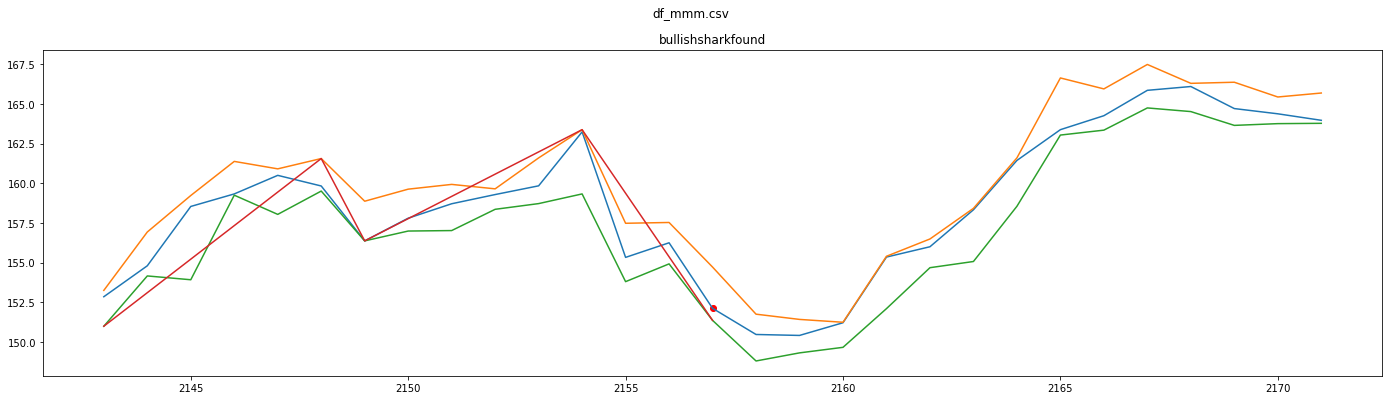

[2143, 2148, 2149, 2154, 2157] 2157


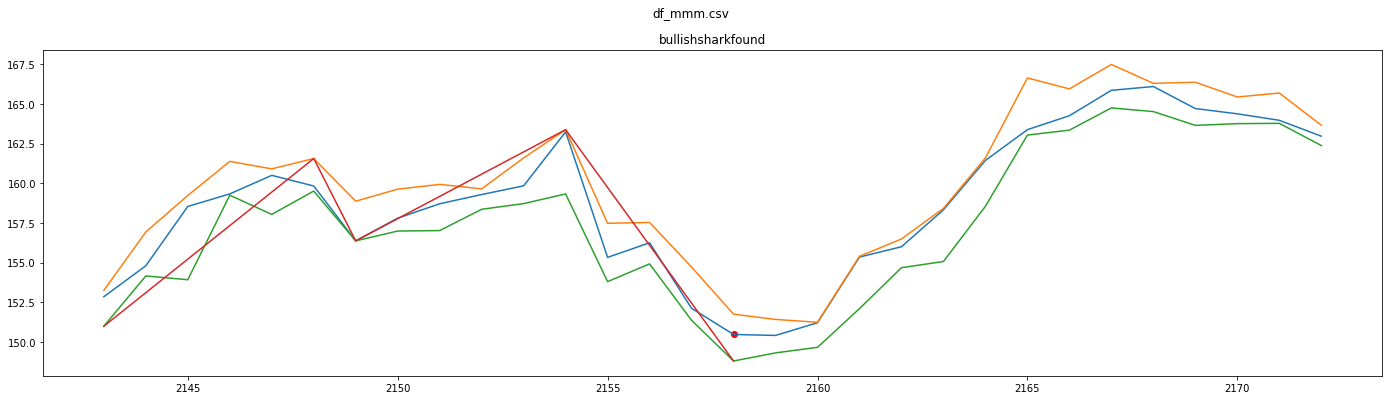

[2143, 2148, 2149, 2154, 2158] 2158


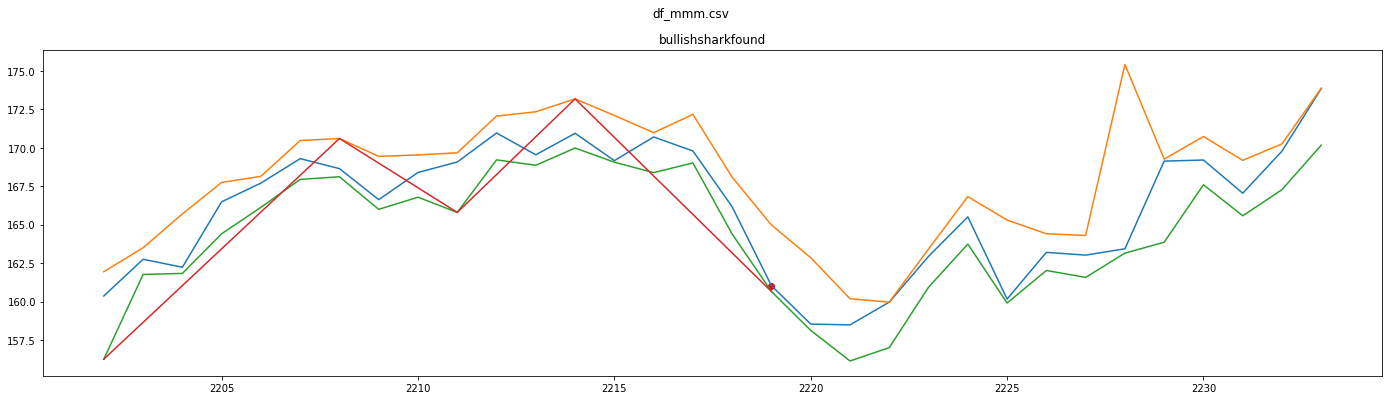

[2202, 2208, 2211, 2214, 2219] 2219


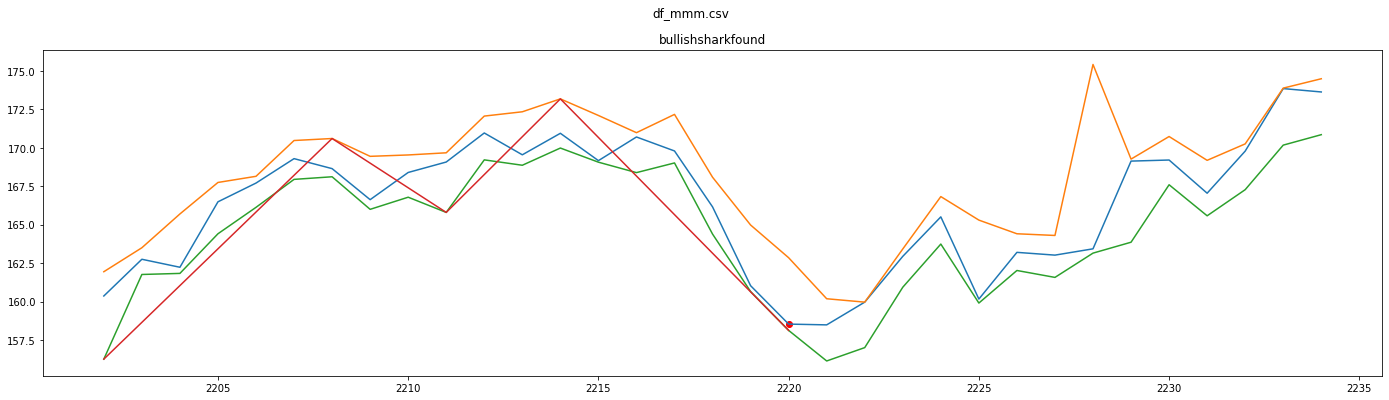

[2202, 2208, 2211, 2214, 2220] 2220
EUR/USD


_________________________________________________

__________________________________
     ___ Period 1 : =>  m30  ___
     ___ Period 2 : =>  H1  ___
__________________________________
Ca$h Ini : 200000
Date début: 2012-01-01
Date fin : 2021-04-29
Etat verbose : 1
Nombre Bougies Exit : 10
Target : 0.06
Stop Loss : 0.1
Trigger Reengage : 0
Trigger Target : 0
Trigger Inverse : 0
Trigger StopLoss : 0
Trigger RSI : 0
Exposure : 5
_bt_report :  2
Verbose :  1
Trigger Spread : 0.025
Save :  0

_________________________________________________


Début des opérations horodatée à 2021-05-31 17:19:08.344573

 _trigger_rsi : 0 


Chargement de la nouvelle base


 Le rate du ticker EUR/USD est à  1.0 
Bases chargées
TETEL process effectué
 ENTERING THE BACKTEST 
100%|██████████| 2346/2346 [00:00<00:00, 27099.45it/s]
 2019-07-09 00:00:00 
Position 1 sold at 154.5244598388672 (verification liste 154.5244598388672 )
 2019-07-23 00:00:00 
1 position (TIME

In [25]:
__author__ = 'LumberJack'
__copyright__ = 'D.A.G. 26 - 5781'
__version__ = 'v1.6'

####################################################################
####################################################################
############################### GOLEM FX ###########################
####################################################################
####################################################################

'''
In this Version, the most significative change is the dynamic RL by sliping windows, and several minor changes as save bt
New features : Doublon of _period but from _period2
Rollback to _cash_ini for sizing => better comparison
'''
from functools import reduce
import joblib
import os
import pandas as pd
import numpy as np
import colorama as col
import ffn
from matplotlib import pyplot as plt
import warnings
import joblib
import datetime as dt
import fxcmpy
from tqdm import tqdm
import sys
import time
from scipy.signal import argrelextrema
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
sys.path.append('../') 
import pyttsx3
engine = pyttsx3.init()
from slack_sdk import WebClient
_slack_token = joblib.load('TOKENS/_slack_token.dag')
client = WebClient(token=_slack_token)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import talib
%matplotlib inline
warnings.filterwarnings("ignore")

TIK = ['AUD','NZD','GBP','JPY','CHF','CAD','SEK','NOK','ILS','MXN','USD','EUR']
RATE = [0.776,0.721,1.3912,1/105.91,1/0.892,1/1.2681,1/8.2884,1/8.4261,1/3.2385,1/20.1564,1,1.21]
df_ratefx = pd.DataFrame(index=TIK)
df_ratefx['rate'] = RATE

x = 'EUR/USD'
_period = 'm30'
_period2 = 'H1'
_ticker = x.replace('/','')
_start = '2012-01-01' # start the train there '2010-01-01'
_mid = '2016-06-30' # stop the train and begin the test there '2016-08-31'
_stop = '2017-12-31' # stop the test there. After that, it is kept for oos '2017-12-31'
_last = '2021-04-29' # '2020-12-31'
_nb_bougie_exit = 10
_trigger_reengage = 0
_trigger_target = 0
_trigger_invers = 0
_trigger_sl = 0
_trigger_rsi = 0
_verbose = 1
_cash_ini = 200000
_target = 0.06
_sl = 0.1
_exposure = 5
_rate = df_ratefx.loc[x[4:],'rate']
_size = 0#_cash_ini / df_ratefx.loc[x[:3],'rate']
_trigger_spread = 0.025
_no_access = 0

if not os.path.exists('VARS'):
    os.makedirs('VARS')

if not os.path.exists('STATS'):
    os.makedirs('STATS')

if not os.path.exists('VARS/'+_ticker):
    os.makedirs('VARS/'+_ticker)

if not os.path.exists('MODELS'):
    os.makedirs('MODELS')

if not os.path.exists('BASES/'):
    os.makedirs('BASES/')

if not os.path.exists('BT'):
    os.makedirs('BT')

joblib.dump(x,'VARS/'+_ticker+'/'+'x.dag')
joblib.dump(_ticker,'VARS/'+_ticker+'/'+'ticker.dag')
joblib.dump(_period ,'VARS/'+_ticker+'/'+'period.dag')
joblib.dump(_period2 ,'VARS/'+_ticker+'/'+'period2.dag')
joblib.dump(_start,'VARS/'+_ticker+'/'+'start.dag')
joblib.dump(_mid,'VARS/'+_ticker+'/'+'mid.dag')
joblib.dump(_stop ,'VARS/'+_ticker+'/'+'stop.dag')
joblib.dump(_last,'VARS/'+_ticker+'/'+'last.dag')
joblib.dump(_nb_bougie_exit ,'VARS/'+_ticker+'/'+'nbbougieexit.dag') 
joblib.dump(_trigger_reengage,'VARS/'+_ticker+'/'+'trig_reengage.dag')
joblib.dump(_trigger_target,'VARS/'+_ticker+'/'+'trig_target.dag')
joblib.dump(_trigger_invers ,'VARS/'+_ticker+'/'+'trig_invers.dag')
joblib.dump(_trigger_sl ,'VARS/'+_ticker+'/'+'trig_sl.dag')
joblib.dump(_verbose,'VARS/'+_ticker+'/'+'verbose.dag')
joblib.dump(_cash_ini,'VARS/'+_ticker+'/'+'cashini.dag')
joblib.dump(_target,'VARS/'+_ticker+'/'+'target.dag')
joblib.dump(_exposure,'VARS/'+_ticker+'/'+'exposure.dag')
joblib.dump(_sl,'VARS/'+_ticker+'/'+'sl.dag')
joblib.dump(df_ratefx,'VARS/'+_ticker+'/'+'df_ratefx.dag')
joblib.dump(_rate,'VARS/'+_ticker+'/'+'rate.dag')
joblib.dump(_size,'VARS/'+_ticker+'/'+'size.dag')
joblib.dump(_trigger_spread,'VARS/'+_ticker+'/'+'trig_spread.dag')

print('Global Optimized LumberJack Environment Motor for For_Ex\nLumberJack Jyss 5781(c)')
print(col.Fore.CYAN,'°0Oo_D.A.G._26_oO0°')
print(col.Fore.YELLOW,col.Back.BLUE,'--- Golem FX #v1.6 ---',col.Style.RESET_ALL)
print('')

engine.say(" Initialization of Gaulem 1, FX system")
engine.say("Gaulem's Connexion to the a p i")
engine.runAndWait()


################
### FONTIONS
###############

def init_base():
  
    """[Première initialisation de la base Live à partir de la base HDD et vérifications d'usage]
    """    
    _t1 = dt.datetime.now()
    print('Début des opérations horodatée à',col.Fore.YELLOW,dt.datetime.now(),col.Style.RESET_ALL)
    
    print('\nINITIALISATION DE LA BASE\n')

    print('Ticker :',col.Fore.YELLOW,x,col.Style.RESET_ALL)

    df,df_H1 = load_hdd()
    
    df = drop_we(df)
    is_we(df)
    
    df_H1 = drop_we(df_H1)
    is_we(df_H1)

    df = make_mid(df)
    
    df_H1 = make_mid(df_H1)

    df = reduce_df(df)

    df_H1 = reduce_df(df_H1)

    #df, df_H1, df_D1, df_W1 =  make_indicators(df, df_H1)

    engine.say("The job is done")
    engine.runAndWait()

    print('Sauvegarde des Bases')
    joblib.dump(df_H1,'BASES/'+_ticker+'_'+_period2)
    joblib.dump(df,'BASES/'+_ticker+'_'+_period)
    #joblib.dump(df_D1,'BASES/'+_ticker+'_D1')
    #joblib.dump(df_W1,'BASES/'+_ticker+'_W1')
    print('Bases sauvegardées')

    engine.say("All the bases are saved")
    engine.runAndWait()

    print('\ndf :',df,'\n')
    print('\ndf_H1 :',df_H1,'\n')
    #print('\ndf_D1 :',df_D1,'\n')
    #print('\ndf_W1 :',df_W1,'\n') 

    #print('\nAnalyse des nan dans df :')
    #check_nan(df)

    #print('\nAnalyse des inf :')
    #check_inf(df)

    #print('\n Analyse des bougies manquantes :')
    #missing_candle_hdd(df)

    _t2 = dt.datetime.now()
    print('Fin des opérations horodatée à',col.Fore.YELLOW,dt.datetime.now(),col.Style.RESET_ALL)
    print('Executé en :',(_t2 - _t1))
    return(df,df_H1)

def peak_detect(high,low,order=3):
    #print('price.shape',price.shape)
    max_idx = list(argrelextrema(high,np.greater,order=order)[0])
    #print('max_idx shape',len(max_idx))
    min_idx = list(argrelextrema(low,np.less,order=order)[0])
    #print('min_idx shape',len(min_idx))
    idx = max_idx + min_idx
    #print('idx shape',len(idx))
    idx.sort()
    CURRENT = []
    for i in idx:
        if i in max_idx:
            CURRENT.append(high[i])
        else:
            CURRENT.append(low[i])


    if idx[-1] in max_idx:
        CURRENT.append(low[len(high)-1])

    else:
        CURRENT.append(high[len(low)-1])
    
    CURRENT = CURRENT[-5:]
    _current_idx = idx[-4:] + [len(high)-1]
    #print('current_idx shape',len(current_idx))
    _start = min(_current_idx)
    _end = max(_current_idx)
    return _current_idx,CURRENT,_start,_end 


def is_gartley(moves,err_allowed):  
    XA=moves[0]
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
   
    AB_range = np.array([0.618 - err_allowed,0.618 + err_allowed])*abs(XA)
    BC_range = np.array([0.382 - err_allowed,0.886 + err_allowed])*abs(AB)
    CD_range = np.array([1.27 - err_allowed,1.618 + err_allowed])*abs(BC)
        
    
    if XA>0 and AB<0 and BC>0 and CD<0:
        
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
            return 1
        else:
            return np.isnan
        
    elif XA<0 and AB>0 and BC<0 and CD>0:
        
               
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan
    
def is_butterfly(moves,err_allowed):  
    
    XA=moves[0]
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
    
    AB_range = np.array([0.786 - err_allowed,0.786 + err_allowed])*abs(XA)
    BC_range = np.array([0.382 - err_allowed,0.886 + err_allowed])*abs(AB)
    CD_range = np.array([1.618 - err_allowed,2.618 + err_allowed])*abs(BC)
        
    
    if XA>0 and AB<0 and BC>0 and CD<0:
        
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
            return 1
        else:
            return np.NaN
        
    elif XA<0 and AB>0 and BC<0 and CD>0:
        
               
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan       

def is_crab(moves,err_allowed):  
    
    XA=moves[0]
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
    
    AB_range = np.array([0.382 - err_allowed,0.618 + err_allowed])*abs(XA)
    BC_range = np.array([0.382 - err_allowed,0.886 + err_allowed])*abs(AB)
    CD_range = np.array([2.24 - err_allowed,3.618 + err_allowed])*abs(BC)
        
    
    if XA>0 and AB<0 and BC>0 and CD<0:
        
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
            return 1
        else:
            return np.NaN
        
    elif XA<0 and AB>0 and BC<0 and CD>0:
        
               
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan      
    
def is_bat(moves,err_allowed):  
    
    XA=moves[0]
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
    
    AB_range = np.array([0.382 - err_allowed,0.5 + err_allowed])*abs(XA)
    BC_range = np.array([0.382 - err_allowed,0.886 + err_allowed])*abs(AB)
    CD_range = np.array([1.618 - err_allowed,2.618 + err_allowed])*abs(BC)
        
    
    if XA>0 and AB<0 and BC>0 and CD<0:
        
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
            return 1
        else:
            return np.NaN
        
    elif XA<0 and AB>0 and BC<0 and CD>0:
        
               
        if AB_range[0]<abs(AB)<AB_range[1] and BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan
    
def is_abcd(moves,err_allowed):  
    
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
    
    
    BC_range = np.array([0.618 - err_allowed,0.618 + err_allowed])*abs(AB)
    CD_range = np.array([1.618 - err_allowed,1.618 + err_allowed])*abs(BC)
    CD2_range = np.array([1 - err_allowed,1 + err_allowed])*abs(AB)
    
    
        
    
    if AB<0 and BC>0 and CD<0 :
        
        if BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1] \
        and CD2_range[0]<abs(CD)<CD2_range[1] :
            return 1
        else:
            return np.NaN
        
    elif AB>0 and BC<0 and CD>0 :
        
               
        if BC_range[0]<abs(AB)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1]\
        and CD2_range[0]<abs(CD)<CD2_range[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan    
    
def is_shark(moves,err_allowed):  
    
    XA=moves[0]
    AB=moves[1]
    BC=moves[2]
    CD=moves[3]
  
    
    #CD_range = np.array([0.886 - err_allowed,1.13 + err_allowed])*abs(XB)
    BC_range = np.array([1.13 - err_allowed,1.618 + err_allowed])*abs(AB)
    CD_range = np.array([1.618 - err_allowed,2.24 + err_allowed])*abs(BC)
    CD_range2 = np.array([0.88 - err_allowed,1.13 + err_allowed])*abs(XA)   
    
    if XA>0 and AB<0 and BC>0 and CD<0 :
        
        if BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1] and CD_range2[0]<abs(XA)<CD_range2[1]:
            return 1
        else:
            return np.NaN
        
    elif XA<0 and AB>0 and BC<0 and CD>0 :
        
               
        if  BC_range[0]<abs(BC)<BC_range[1] and CD_range[0]<abs(CD)<CD_range[1] and CD_range2[0]<abs(XA)<CD_range2[1]:
        
            return -1
        else:
            return np.isnan
    else:
        return np.isnan    
    
    _start = min(_current_idx)
    _end = max(_current_idx)
    _current_pat = price[_current_idx]
    return _current_idx,_current_pat,_start,_end  

def rsi2(df):
    df['MYRSI_2'] = talib.RSI(df.Close,timeperiod=2)
    return(df)

def get_daily(df):
    
    df['Date'] = df.index
    df['Date'] = df['Date'].dt.strftime(date_format='%Y-%m-%d')
    df1 = pd.DataFrame(index=df.Date.unique())
    df1['Lindex'] = list((df.groupby('Date').Date.first()))
    df1['Open'] = list((df.groupby('Date').Open.first()))
    df1['High'] = list((df.groupby('Date').High.max()))
    df1['Low'] = list((df.groupby('Date').Low.min()))
    df1['Close'] = list((df.groupby('Date').Close.last()))

    df1['Symbol'] = _ticker
    df1 = df1.sort_values('Lindex')
    reg = LinearRegression(n_jobs=-1)
    lr_window = 75

    for i in range(lr_window,len(df1)):
        df_X = df1[['Open','High','Low','Close']].iloc[i-lr_window:i,:].copy()
        df_Yopen = df1.loc[df1.index[i-lr_window+1:i+1],'Open'].copy()
        df_Yhigh = df1.loc[df1.index[i-lr_window+1:i+1],'High'].copy()
        df_Ylow = df1.loc[df1.index[i-lr_window+1:i+1],'Low'].copy()
        df_Yclose = df1.loc[df1.index[i-lr_window+1:i+1],'Close'].copy()
        _lr_open = reg.fit(df_X,df_Yopen.to_numpy().reshape(-1, 1))
        df1.loc[df1.index[i],'OpenS'] = _lr_open.predict(df1.loc[df1.index[i],['Open','High','Low','Close']].to_numpy().reshape(1,-1))[0][0]
        _lr_high = reg.fit(df_X,df_Yhigh.to_numpy().reshape(-1, 1))
        df1.loc[df1.index[i],'HighS'] = _lr_high.predict(df1.loc[df1.index[i],['Open','High','Low','Close']].to_numpy().reshape(1,-1))[0][0]
        _lr_low = reg.fit(df_X,df_Ylow.to_numpy().reshape(-1, 1))
        df1.loc[df1.index[i],'LowS'] = _lr_low.predict(df1.loc[df1.index[i],['Open','High','Low','Close']].to_numpy().reshape(1,-1))[0][0]
        _lr_close = reg.fit(df_X,df_Yclose.to_numpy().reshape(-1, 1))
        df1.loc[df1.index[i],'CloseS'] = _lr_close.predict(df1.loc[df1.index[i],['Open','High','Low','Close']].to_numpy().reshape(1,-1))[0][0]

    print('')
    print('Base daily, pour lr_window de',lr_window)
    print('Ecart moyen du Open',(df1.Open.shift(-1) - df1.OpenS).mean())
    print('Ecart moyen du High',(df1.High .shift(-1)- df1.HighS).mean())
    print('Ecart moyen du Low',(df1.Low.shift(-1) - df1.LowS).mean())
    print('Ecart moyen du Close',(df1.Close.shift(-1) - df1.CloseS).mean())
    print('')


    df1 = df1.sort_values('Lindex') ##########
    df1.set_index(pd.to_datetime(df1.Lindex,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True) #####
    df1['Date'] = df1.Lindex
    df1 = df1.drop(['Lindex'],axis=1)
    df1 = df1.iloc[:-1,:]
    return(df1.sort_index(axis=0))

def get_weekly(df):

    df1 = pd.DataFrame()
    df1['Lindex'] = list((df.groupby('Week').Date.first()))
    df1['Open'] = list((df.groupby('Week').Open.first()))
    df1['High'] = list((df.groupby('Week').High.max()))
    df1['Low'] = list((df.groupby('Week').Low.min()))
    df1['Close'] = list((df.groupby('Week').Close.last()))

    df1['Symbol'] = _ticker
    df1 = df1.sort_values('Lindex')
    reg = LinearRegression(n_jobs=-1)
    lr_window = 75

    for i in range(lr_window,len(df1)):
        df_X = df1[['Open','High','Low','Close']].iloc[i-lr_window:i,:].copy()
        df_Yopen = df1.loc[df1.index[i-lr_window+1:i+1],'Open'].copy()
        df_Yhigh = df1.loc[df1.index[i-lr_window+1:i+1],'High'].copy()
        df_Ylow = df1.loc[df1.index[i-lr_window+1:i+1],'Low'].copy()
        df_Yclose = df1.loc[df1.index[i-lr_window+1:i+1],'Close'].copy()
        _lr_open = reg.fit(df_X,df_Yopen.to_numpy().reshape(-1, 1))
        df1.loc[df1.index[i],'OpenS'] = _lr_open.predict(df1.loc[df1.index[i],['Open','High','Low','Close']].to_numpy().reshape(1,-1))[0][0]
        _lr_high = reg.fit(df_X,df_Yhigh.to_numpy().reshape(-1, 1))
        df1.loc[df1.index[i],'HighS'] = _lr_high.predict(df1.loc[df1.index[i],['Open','High','Low','Close']].to_numpy().reshape(1,-1))[0][0]
        _lr_low = reg.fit(df_X,df_Ylow.to_numpy().reshape(-1, 1))
        df1.loc[df1.index[i],'LowS'] = _lr_low.predict(df1.loc[df1.index[i],['Open','High','Low','Close']].to_numpy().reshape(1,-1))[0][0]
        _lr_close = reg.fit(df_X,df_Yclose.to_numpy().reshape(-1, 1))
        df1.loc[df1.index[i],'CloseS'] = _lr_close.predict(df1.loc[df1.index[i],['Open','High','Low','Close']].to_numpy().reshape(1,-1))[0][0]

    print('')
    print('Base weekly, pour lr_window de',lr_window)
    print('Ecart moyen du Open',(df1.Open.shift(-1) - df1.OpenS).mean())
    print('Ecart moyen du High',(df1.High .shift(-1)- df1.HighS).mean())
    print('Ecart moyen du Low',(df1.Low.shift(-1) - df1.LowS).mean())
    print('Ecart moyen du Close',(df1.Close.shift(-1) - df1.CloseS).mean())
    print('')
    
    df1 = df1.sort_values('Lindex')
    df1.set_index(pd.to_datetime(df1.Lindex,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True)
    df1['Symbol'] = _ticker
    df1['Date'] = df1.Lindex
    df1 = df1.drop(['Lindex'],axis=1) 
    #if df.index[-1].weekday() != 4:  
     #   df1 = df1.iloc[:-1,:]
    return(df1.sort_index(axis=0))

def import_rsi(df,df1,_suffix='hourly'):
    df1['RSI_2'] = talib.RSI(df1.Close,timeperiod =2)
    df1['RSI_14'] = talib.RSI(df1.Close,timeperiod =14)
    df['DateIndex'] = df.index
    df1['DateIndex'] = df1.index
    df1.loc[df1.index[-1] + pd.Timedelta('1 hours'),:] = 999
    df1[['RSI_2','RSI_14']] = df1[['RSI_2','RSI_14']].shift(1)
    df = df.join(df1[['RSI_2','RSI_14']],how='left',on='DateIndex',rsuffix=_suffix)
    df.rename(columns = {'RSI_2':'RSI_2_'+_suffix},inplace=True)
    df.rename(columns = {'RSI_14':'RSI_14_'+_suffix},inplace=True)
    try:
        df = df.drop(['Date'+_suffix],axis=1)
    except:
        pass        
    df['RSI_2_'+_suffix].fillna(method='ffill', inplace=True)
    df['RSI_14_'+_suffix].fillna(method='ffill', inplace=True)
    
    return(df.sort_index(axis=0))

def transform_H1(df1):
    
    reg = LinearRegression(n_jobs=-1)
    lr_window = 75

    for i in range(lr_window,len(df1)): # FAUX A CORRIGER SI BESOIN
        df_X = df1[['Open','High','Low','Close']].iloc[i-lr_window:i,:].copy()
        df_Yopen = df1.loc[df1.index[i-lr_window+1:i+1],'Open'].copy()
        df_Yhigh = df1.loc[df1.index[i-lr_window+1:i+1],'High'].copy()
        df_Ylow = df1.loc[df1.index[i-lr_window+1:i+1],'Low'].copy()
        df_Yclose = df1.loc[df1.index[i-lr_window+1:i+1],'Close'].copy()
        _lr_open = reg.fit(df_X,df_Yopen.to_numpy().reshape(-1, 1))
        _lr_high = reg.fit(df_X,df_Yhigh.to_numpy().reshape(-1, 1))
        _lr_low = reg.fit(df_X,df_Ylow.to_numpy().reshape(-1, 1))
        _lr_close = reg.fit(df_X,df_Yclose.to_numpy().reshape(-1, 1))
        df1.loc[df1.index[i],'OpenS'] = _lr_open.predict(df1.loc[df1.index[i],['Open','High','Low','Close']].to_numpy().reshape(1,-1))[0][0]
        df1.loc[df1.index[i],'HighS'] = _lr_open.predict(df1.loc[df1.index[i],['Open','High','Low','Close']].to_numpy().reshape(1,-1))[0][0]
        df1.loc[df1.index[i],'LowS'] = _lr_open.predict(df1.loc[df1.index[i],['Open','High','Low','Close']].to_numpy().reshape(1,-1))[0][0]
        df1.loc[df1.index[i],'CloseS'] = _lr_open.predict(df1.loc[df1.index[i],['Open','High','Low','Close']].to_numpy().reshape(1,-1))[0][0]

    print('')
    print('Base hourly, pour lr_window de',lr_window)
    print('Ecart moyen du Open',(df1.Open.shift(-1) - df1.OpenS).mean())
    print('Ecart moyen du High',(df1.High .shift(-1)- df1.HighS).mean())
    print('Ecart moyen du Low',(df1.Low.shift(-1) - df1.LowS).mean())
    print('Ecart moyen du Close',(df1.Close.shift(-1) - df1.CloseS).mean())
    print('')

    #df1['OpenS'] = df1.Open.shift(1)
    #df1['HighS'] = df1.High.shift(1)
    #df1['LowS'] = df1.Low.shift(1)
    #df1['CloseS'] = df1.Close.shift(1)
    #df1.set_index(pd.to_datetime(df1.index,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True)

    return(df1.sort_index(axis=0))

def timerange1D(df):
        df['Date'] = df.index
        df['Date'] = df['Date'].dt.strftime(date_format='%Y-%m-%d')
        return(df.sort_index(axis=0))

def timerange1W(df):
        df['WeekNo'] = pd.to_datetime(df.index)
        df['WeekNo'] = df['WeekNo'].dt.isocalendar().week.astype(str)
        df['Year'] = pd.to_datetime(df.index)
        df['Year'] = df['Year'].dt.year.astype(str)
        df['Date'] = pd.to_datetime(df.index)
        df['list']=df[['Year','WeekNo']].values.tolist()
        df['Week']=df['list'].apply('_'.join)
        #df.sort_values('Date')
        return(df.sort_index(axis=0))

def Wilder(data, window):
    start = np.where(~np.isnan(data))[0][0] # Positionne après les nan
    Wilder = np.array([np.nan]*len(data)) # Replace les nan en début de liste pour ne pas changer la longueur
    Wilder[start+window-1] = data[start:(start+window)].mean() #Simple Moving Average pour la window window
    for i in range(start+window,len(data)):
        Wilder[i] = ((Wilder[i-1]*(window-1) + data[i])/window) #Wilder Smoothing
    return(Wilder)

def ema(df, _window):
    df['EMA_'+str(_window)] = df.Close.ewm(span=_window,adjust=False).mean()
    return(df.sort_index(axis=0))

def sma(df,_window=200):
    df['SMA_'+str(_window)] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window = _window).mean())
    return(df.sort_index(axis=0))

def slowstochastic(df,_window=5,_per=3):
    df['Lowest_'+str(_window)] = df['Low'].transform(lambda x: x.rolling(window = _window).min())
    df['Highest_'+str(_window)] = df['High'].transform(lambda x: x.rolling(window = _window).max())
    df['slow_K'+str(_window)] = (((df['Close'] - df['Lowest_'+str(_window)])/(df['Highest_'+str(_window)] - df['Lowest_'+str(_window)]))*100).rolling(window = _per).mean()
    df['slow_D'+str(_window)] = df['slow_K'+str(_window)].rolling(window = _per).mean()
    df = df.drop(['Lowest_'+str(_window),'Highest_'+str(_window)],axis=1)
    return(df.sort_index(axis=0))

def perq(df,_window=20) :
    df['HH'] = df['High'].rolling(_window).max()
    df['LL'] = df['Low'].rolling(_window).min()
    df['PerQ'] = (df.HH - df.Close)/(df.HH - df.LL)
    df = df.drop(['HH','LL'],axis=1)
    return(df)

def rsi_home(df,_window=5):
    print(col.Fore.MAGENTA+'\nCalcul RSI'+col.Style.RESET_ALL)
    
    ##### Pour chaque Symbol, Calcule la différence du close de la cellule précédente à la cellule actuelle
    df['Diff'] = df['Close'].diff()
    ##### Ne garde que les valeurs positives et met 0 sinon
    df['Up'] = df['Diff']
    df.loc[(df['Up']<0), 'Up'] = 0
    ##### Pour chaque Symbol, Calcule la différence du close de la cellule précédente à la cellule actuelle
    df['Down'] = df['Diff']
    ##### Ne garde que les valeurs négatives et met 0 sinon. Passe ensuite les valeurs négatives en valeur absolue
    df.loc[(df['Down']>0), 'Down'] = 0 
    df['Down'] = abs(df['Down'])

    ##### Calcule sur les fast & slow les moyennes des UP est DOWN créés
    df['avg_up'+str(_window)] = df['Up'].rolling(window=_window).mean()
    df['avg_down'+str(_window)] = df['Down'].rolling(window=_window).mean()

    ##### Pour les fast & slow, calcule le ratio de (moyenne UP / moyenne DOWN)
    df['RS_'+str(_window)] = df['avg_up'+str(_window)] / df['avg_down'+str(_window)]

    ##### Le RSI fast & slow peut alors être calculé
    ##### 100 - (100/(1 + RS))
    df['RSI_'+str(_window)] = 100 - (100/(1+df['RS_'+str(_window)]))

    df = df.drop(['Diff','Up','Down','avg_up'+str(_window),'avg_down'+str(_window),'RS_'+str(_window)],axis=1)

    return(df.sort_index(axis=0))

def rsi(df,_window=14):
    df['RSI_'+str(_window)] = talib.RSI(df.Close,_window)
    return(df)

def stochrsi(df,_window=14):
    df['RSI_'+str(_window)] = talib.RSI(df.Close,_window)
    df['RSI_Stoch'] = ((df['RSI_'+str(_window)] - df['RSI_'+str(_window)].rolling(_window).min())/(df['RSI_'+str(_window)].rolling(_window).max() - df['RSI_'+str(_window)].rolling(_window).min())) * 100
    return(df.sort_index(axis=0))

def bollinger(df,_slow=15):
    df['MA'+str(_slow)] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=_slow).mean())
    df['SD'] = df.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=_slow).std())
    df['UpperBand'] = df['MA'+str(_slow)] + 2*df['SD']
    df['LowerBand'] = df['MA'+str(_slow)] - 2*df['SD']
    df = df.drop(['MA'+str(_slow),'SD'],axis=1)
    return(df.sort_index(axis=0))

def onlosma(df,_window=8):
    df['ONLOSMA_'+str(_window)] = df.Low.rolling(_window).mean()
    return(df.sort_index(axis=0))

def onhisma(df,_window=8):
    df['ONHISMA_'+str(_window)] = df.High.rolling(_window).mean()
    return(df.sort_index(axis=0))

def atr(df,_window=14):
    df['prev_close'] = df['Close'].shift(1)

    df['TR'] = np.maximum((df['High'] - df['Low']), 
                        np.maximum(abs(df['High'] - df['prev_close']), 
                        abs(df['prev_close'] - df['Low'])))

    df.loc[df.Symbol==_ticker,'ATR_'+str(_window)] = Wilder(df['TR'], _window)
    return(df.sort_index(axis=0))       

def pivot(df):
    df['PP'] = (df.High + df.Low + df.Close) / 3
    df['S38'] = df.PP - (0.382 * (df.High - df.Low))
    df['S62'] = df.PP - (0.618 * (df.High - df.Low))
    df['S78'] = df.PP - (0.78 * (df.High - df.Low))
    df['S100'] = df.PP - (1 * (df.High - df.Low))
    df['S138'] = df.PP - (1.382 * (df.High - df.Low))
    df['S162'] = df.PP - (1.618 * (df.High - df.Low))
    df['S178'] = df.PP - (1.78 * (df.High - df.Low))
    df['S200'] = df.PP - (2 * (df.High - df.Low))
    df['R38'] = df.PP + (0.382 * (df.High - df.Low))
    df['R62'] = df.PP + (0.618 * (df.High - df.Low))
    df['R78'] = df.PP + (0.78 * (df.High - df.Low))
    df['R100'] = df.PP + (1 * (df.High - df.Low))
    df['R138'] = df.PP + (1.382 * (df.High - df.Low))
    df['R162'] = df.PP + (1.618 * (df.High - df.Low))
    df['R178'] = df.PP + (1.78 * (df.High - df.Low))
    df['R200'] = df.PP + (2 * (df.High - df.Low))
    return(df.sort_index(axis=0))

def pivotimportdf(df,df1):
    """[Import from df1 to df all the pivots]

    Args:
        df ([pandas]): [Where you've got to import pivot : ex : intraday]
        df1 ([pandas]): [from where you import pivo : ex : weekly]
    """    
    df1['Date'] = pd.to_datetime(df1.Date)
    df['Date'] = pd.to_datetime(df.Date)
    df1.loc[df1.index[-1] + pd.Timedelta('7 days'),:] = 999
    df1[['PP' ,'S38', 'S62', 'S78' ,'S100'  ,'S138'  ,'S162' ,'S178','S200'  ,'R38'  ,'R62','R78' ,'R100','R178' ,'R138' ,'R162' ,'R200' ]] = \
        df1[['PP' ,'S38', 'S62', 'S78' ,'S100'  ,'S138'  ,'S162' ,'S178','S200'  ,'R38'  ,'R62','R78' ,'R100','R178' ,'R138' ,'R162' ,'R200' ]].shift(1)
    
    df = df.join(df1[['PP','S38','S62','S78','S100','S138','S162','S178','S200','R38','R62','R78','R100','R138','R162','R178','R200','Date']],how='left',on='Date',rsuffix='_2drop')
    df = df.drop(['Date_2drop'],axis=1)
    df.PP.fillna(method='ffill', inplace=True)
    df.S38.fillna(method='ffill', inplace=True)
    df.S62.fillna(method='ffill', inplace=True)
    df.S78.fillna(method='ffill', inplace=True)
    df.S100.fillna(method='ffill', inplace=True)
    df.S138.fillna(method='ffill', inplace=True)
    df.S162.fillna(method='ffill', inplace=True)
    df.S178.fillna(method='ffill', inplace=True)
    df.S200.fillna(method='ffill', inplace=True)
    df.R38.fillna(method='ffill', inplace=True)
    df.R62.fillna(method='ffill', inplace=True)
    df.R78.fillna(method='ffill', inplace=True)
    df.R100.fillna(method='ffill', inplace=True)
    df.R138.fillna(method='ffill', inplace=True)
    df.R162.fillna(method='ffill', inplace=True)
    df.R178.fillna(method='ffill', inplace=True)
    df.R200.fillna(method='ffill', inplace=True)
    return(df.sort_index(axis=0))

def adr(df,_window):
    df['ADR'] = (df.High - df.Low).rolling(_window).mean()#.shift(1)
    df['ADR_High'] = df['Low'] + df['ADR']
    df['ADR_Low'] = df['High'] - df['ADR']
    df = df.drop(['list','Week','WeekNo','Year'],axis=1)
    return(df.sort_index(axis=0))

def rvi(df,_window):
    df['Std'] = df.Close.rolling(window=_window).std()
    df['Positive'] = np.where((df.Std > df.Std.shift(1)),df.Std,0)
    df['Negative'] = np.where((df.Std < df.Std.shift(1)),df.Std,0)
    df['PoMA'] = Wilder(df['Positive'],_window)
    df['NeMA'] = Wilder(df['Negative'],_window)
    df['RVI'] = (100 * df['PoMA']) / (df['PoMA'] + df['NeMA'])
    df = df.drop(['Std','Positive','Negative','PoMA','NeMA'],axis=1)
    return(df.sort_index(axis=0))

def getadr(df,df1):
    """[Get adr from df to df1]

    Args:
        df ([pandas]): [ex : daily]
        df1 ([pandas]): [ex : df intraday]
    """    
    _suffix='_2Drop'
    if df.index[-1].weekday() != 4:
        df.loc[df.index[-1] + pd.Timedelta('1 days'),:] = 999
    else:
        df.loc[df.index[-1] + pd.Timedelta('3 days'),:] = 999
        
    df['Date'] = pd.to_datetime(df.index)
    df1['Date'] = pd.to_datetime(df1.Date)


    df['ADR_High'] = df['ADR_High'].shift(1)
    df['ADR_Low'] = df['ADR_Low'].shift(1)
    #df['High'] = df['High'].shift(1)
    #df['Low'] = df['Low'].shift(1)
    #df1 = df1.join(df[['ADR','High','Low']],how='left',on='Date',rsuffix=_suffix)
    #df1 = df1.rename(columns={'High'+_suffix: "DayHigh", 'Low'+_suffix: "DayLow"})
    df1 = df1.join(df[['ADR_High']],how='left',on='Date',rsuffix=_suffix)
    df1 = df1.join(df[['ADR_Low']],how='left',on='Date',rsuffix=_suffix)
    try:
        df1 = df1.drop(['Date'+_suffix],axis=1)
    except:
        pass
    df1['ADR_High'].fillna(method='ffill', inplace=True)
    df1['ADR_Low'].fillna(method='ffill', inplace=True)
   
    return(df1.sort_index(axis=0))

def adrhnl_original(df):
    global _flagh, _flagl , val
    _flagh = 0
    _flagl = 0
    val = 0

    def fh(row):
        global _flagh, val
    
        if row['High'] < row['DayHigh'] and row['High'] <= row['HighShift'] and _flagh == 0 and row['Date'] == row['DateShiftMinus'] and row['Date'] == row['DateShiftPlus']:
            val = row['HighShift'] # np.nan
            _flagh = 0
        
        elif row['High'] < row['DayHigh'] and row['High'] > row['HighShift'] and _flagh == 0 and row['Date'] == row['DateShiftMinus'] and row['Date'] == row['DateShiftPlus']:
            val = row['High'] # 
            _flagh = 0
                
        return(val)

    def fl(row):
        global _flagl, val
        
        if row['Low'] > row['DayLow'] and row['Low'] >= row['LowShift'] and _flagl == 0 and row['Date'] == row['DateShiftMinus'] and row['Date'] == row['DateShiftPlus']:
            _flagl = 0
            val =  row['LowShift'] # np.nan
        
        elif row['Low'] > row['DayLow'] and row['Low'] < row['LowShift'] and _flagl == 0 and row['Date'] == row['DateShiftMinus'] and row['Date'] == row['DateShiftPlus']:
            val = row['Low']
            _flagl = 0

        return(val)

    
    df['DateShiftMinus'] = df.Date.shift(1)
    df['DateShiftPlus'] = df.Date.shift(-1)

    df['HighShift'] = df.High.shift(1)
    df['LowShift'] = df.Low.shift(1)

    #df['DayHigh'] = df['High'].groupby(df['Date']).max()
    #df['DayHigh'].fillna(method='ffill', inplace=True)
    #df['DayLow'] = df['Low'].groupby(df['Date']).min()
    #df['DayLow'].fillna(method='ffill', inplace=True)


    df['HighSlope'] = df.apply(fh,axis=1)
    df['LowSlope'] = df.apply(fl,axis=1)

    df['ADR_High'] = df.LowSlope + df.ADR
    df['ADR_Low'] = df.HighSlope - df.ADR

    df = df.drop(['DateShiftMinus','DateShiftPlus','HighShift','LowShift','HighSlope','LowSlope','DayHigh','DayLow'],axis=1)
    return(df.sort_index(axis=0))

def adrhnl(df):
    df['ADR_High'] = df.Low + df.ADR
    df['ADR_Low'] = df.High - df.ADR
    return(df.sort_index(axis=0))

def sbgamma(df):      
    _op1 = (df.Close - df.Open)/(df.Close.shift(1) - df.Open.shift(1))
    _op2 = (df.Close - df.Open)/(df.CloseAsk.shift(1) - df.OpenAsk.shift(1))
    _op3 = (df.Close - df.Open)/(df.CloseBid.shift(1) - df.OpenBid.shift(1))
    _op4 = (df.Close - df.Open)/(df.CloseBid.shift(1) - df.OpenAsk.shift(1))
    _op5 = (df.Close - df.Open)/(df.CloseAsk.shift(1) - df.OpenBid.shift(1))

    _condition1 = df.Close.shift(1) != df.Open.shift(1)
    _condition2 = df.CloseAsk.shift(1) != df.OpenAsk.shift(1)
    _condition3 = df.CloseBid.shift(1) != df.OpenBid.shift(1)
    _condition4 = df.CloseBid.shift(1) != df.OpenAsk.shift(1)
    _condition5 = df.CloseAsk.shift(1) != df.OpenBid.shift(1)

    df['SB_Gamma'] = np.where(_condition1,_op1,np.where(_condition2,_op2,np.where(_condition3,_op3,np.where(_condition4,_op4,np.where(_condition5,_op5,1.93E13)))))
    return(df.sort_index(axis=0))

def importohlc(df,df1,_suffix):
    df['Date'] = pd.to_datetime(df.Date)
    df1['Date'] = pd.to_datetime(df1.index)
    
    if _suffix=='daily':
        if df1.index[-1].weekday() != 4:
            df1.loc[df1.index[-1] + pd.Timedelta('1 days'),:] = 999
        else:
            df1.loc[df1.index[-1] + pd.Timedelta('3 days'),:] = 999
    
    if _suffix=='weekly':
        if df1.index[-1].weekday() != 0:
            df1.loc[df1.index[-1] + pd.Timedelta('7 days'),:] = 999
        
    df1[['OpenS','HighS','LowS','CloseS']] = df1[['OpenS','HighS','LowS','CloseS']].shift(1)
    df = df.join(df1[['OpenS','HighS','LowS','CloseS']],how='left',on='Date',rsuffix=_suffix)
    df.rename(columns = {'OpenS':'OpenShift'+_suffix,'HighS':'HighShift'+_suffix,'LowS':'LowShift'+_suffix,'CloseS':'CloseShift'+_suffix},inplace=True)
    
    try:
        df = df.drop(['Date'+_suffix],axis=1)
    except:
        pass        
    df['OpenShift'+_suffix].fillna(method='ffill', inplace=True)
    df['HighShift'+_suffix].fillna(method='ffill', inplace=True)
    df['LowShift'+_suffix].fillna(method='ffill', inplace=True)
    df['CloseShift'+_suffix].fillna(method='ffill', inplace=True)
    return(df.sort_index(axis=0))

def featuring(df):
    features = pd.DataFrame()
    features = pd.DataFrame(index=df.index)
    features['Symbol'] = df['Symbol']
    features['Date'] = df['Date']
    features['FEMA_21'] = df['Close'] * df['EMA_21']
    features['FEMA_8'] = df['Close'] * df['EMA_8']
    features['FADRLo'] = df['Close'] * df['ADR_Low']
    features['FADRHi'] = df['Close'] * df['ADR_High']
    features['FRVI40'] = df['RVI']*df['Close']/100
    features['FRVI60'] = df['RVI']*df['Close']/100
    '''features['FONLOSMA5'] = df['Low'] * df['ONLOSMA_5']
    features['FONHISMA5'] = df['High'] * df['ONHISMA_5']
    features['FONLOSMA21'] = df['Low'] * df['ONLOSMA_21']
    features['FONHISMA21'] = df['High'] * df['ONHISMA_21']
    features['FONLOSMA34'] = df['Low'] * df['ONLOSMA_34']
    features['FONHISMA34'] = df['High'] * df['ONHISMA_34']'''
    features['FSBGAMMA'] = df['SB_Gamma']
    features['FPerQ'] = df['PerQ']
    #features['FSLOWK5RSI2'] = df['slow_K5'] / df['RSI_2']
    #features['FOPENWEEKLY'] = df['Close'] - df['OpenShift_weekly']#.shift(1)
    #features['FHIGHWEEKLY'] = df['Close'] - df['HighShift_weekly']#.shift(1)
    #features['FLOWWEEKLY'] = df['Close'] - df['LowShift_weekly']#.shift(1)
    #features['FCLOSEWEEKLY'] = df['Close'] - df['CloseShift_weekly']#.shift(1)
    #features['FOPENDAILY'] = df['Close'] - df['OpenShift_daily']#.shift(1)
    #features['FHIGHDAILY'] = df['Close'] - df['HighShift_daily']#.shift(1)
    #features['FLOWDAILY'] = df['Close'] - df['LowShift_daily']#.shift(1)
    #features['FCLOSEDAILY'] = df['Close'] - df['CloseShift_daily']#.shift(1)
    #features['FOPENHOURLY'] = df['Close'] - df['OpenShift_hourly']#.shift(1)
    #features['FHIGHHOURLY'] = df['Close'] - df['HighShift_hourly']#.shift(1)
    #features['FLOWHOURLY'] = df['Close'] - df['LowShift_hourly']#.shift(1)
    #features['FCLOSEHOURLY'] = df['Close'] - df['CloseShift_hourly']#.shift(1)
    features['FSMA200'] = df['Close'] - df['SMA_200']
    features['FBOLUP20'] = df['Close'] - df['UpperBand']
    features['FBOLLOW20'] = df['Close'] - df['LowerBand']
    #features['FRSI2H'] = df['Close'] - df['RSI_2_hourly']
    #features['FRSI14H'] = df['Close'] - df['RSI_14_hourly']
    #features['FPP'] = df['Close'] - df['PP']
    #features['FS38'] = df['Close'] - df['S38']
    #features['FS62'] = df['Close'] - df['S62']
    #features['FS78'] = df['Close'] - df['S78']
    #features['FS100'] = df['Close'] - df['S100']
    #features['FS138'] = df['Close'] - df['S138']
    #features['FS162'] = df['Close'] - df['S162']
    #features['FS178'] = df['Close'] - df['S178']
    #features['FS200'] = df['Close'] - df['S200']
    #features['FR38'] = df['Close'] - df['R38']
    #features['FR62'] = df['Close'] - df['R62']
    #features['FR78'] = df['Close'] - df['R78']
    #features['FR100'] = df['Close'] - df['R100']
    #features['FR138'] = df['Close'] - df['R138']
    #features['FR162'] = df['Close'] - df['R162']
    #features['FR178'] = df['Close'] - df['R178']
    #features['FR200'] = df['Close'] - df['R200']
    '''features['SBATR'] = (df['Close'] - df['Open']) / df['ATR_14']
    features['FRSI2'] = df['RSI_2_hourly']*df['Close']/100
    features['FRSI14'] = df['RSI_14_hourly']*df['Close']/100'''
    features['Signal'] = df['Signal']
    #features = features.dropna()
    return(features.sort_index(axis=0))

def scaling(df):

    features_max = joblib.load('VARS/'+_ticker+'/'+_ticker+'_MAX.dag')
    for label in df.drop(['Date','Symbol','Signal','TRACKER','Valid'],axis=1).columns:
        df[label] = df[label] / features_max[label][0]
        return(df.sort_index(axis=0))

### RSI 2 GLISSANT SB
def strategy5(df,_window=2):
    ##### CONDITIONS SHORT
    _condition_1_bar = (df.MYRSI_2 > 90) & (df.Close < df.SMA_200) #& (df.MYRSI_2.shift() > df.MYRSI_2.shift(2)) \
       #& (df.MYRSI_2.shift(2) > 80 ) & (df.MYRSI_2.shift(3) > 80 ) 

    ##### CONDITIONS LONG
    _condition_1 = (df.MYRSI_2 < 10) & (df.Close > df.SMA_200)# & (df.MYRSI_2.shift() < df.MYRSI_2.shift(2)) \
        #& (df.MYRSI_2.shift(2) < 20 ) & (df.MYRSI_2.shift(3) < 20 ) 
    ##### 1 condition
    df['Signal'] = np.where(_condition_1,1,np.where(_condition_1_bar,-1,0))
    return(df.sort_index(axis=0))

### STOCHASTIC
def strategy(df):
    ##### CONDITIONS LONG
    _condition_1 = (df.slow_K5 < 20) & (df.slow_K5.shift(1) < df.slow_D5.shift(1)) & (df.slow_K5 > df.slow_D5)

    ##### CONDITIONS SHORT
    _condition_1_bar = (df.slow_K5 > 80) & (df.slow_K5.shift(1) > df.slow_D5.shift(1)) & (df.slow_K5 < df.slow_D5)

    ##### 1 condition
    df['Signal'] = np.where(_condition_1,1,np.where(_condition_1_bar,-1,0))
    return(df.sort_index(axis=0)) 

### RSI STOCHASTIC
def strategy2(df):
    ##### CONDITIONS LONG
    _condition_1 = (df.RSI_Stoch < 20) #& (df.slow_K5.shift(1) < df.slow_D5.shift(1)) & (df.slow_K5 > df.slow_D5)

    ##### CONDITIONS SHORT
    _condition_1_bar = (df.RSI_Stoch > 80) #& (df.slow_K5.shift(1) > df.slow_D5.shift(1)) & (df.slow_K5 < df.slow_D5)

    ##### 1 condition
    df['Signal'] = np.where(_condition_1,1,np.where(_condition_1_bar,-1,0))
    return(df.sort_index(axis=0)) 

### RSI 2
def strategy3(df,_window=2):
    df['RSI_'+str(_window)] = talib.RSI(df.Close,_window)
    df['EMA200'] = talib.EMA(df.Close,200)
    ##### CONDITIONS LONG
    _condition_1 = (df.RSI_2 > 5) & (df.Close > df.EMA200) & (df.RSI_2.shift() < 5)

    ##### CONDITIONS SHORT
    _condition_1_bar = (df.RSI_2 < 95) & (df.Close < df.EMA200) & (df.RSI_2.shift() > 95)

    ##### 1 condition
    df['Signal'] = np.where(_condition_1,1,np.where(_condition_1_bar,-1,0))
    return(df.sort_index(axis=0))

def scan_harmonics(df):
    price = df['Close']
    rsi = talib.RSI(price, timeperiod=14)
    high = df['High']
    low = df['Low']
    
    for i in range(len(price)-500,len(price)-1):

        current_idx,current_pat,start,end = peak_detect(high.values[:i+1],low.values[:i+1])

        XA = current_pat[1] - current_pat[0]
        AB = current_pat[2] - current_pat[1]
        BC = current_pat[3] - current_pat[2]
        CD = current_pat[4] - current_pat[3]


        moves=[XA,AB,BC,CD]

        gartley = is_gartley(moves,err_allowed)
        butterfly = is_butterfly(moves,err_allowed)
        crab = is_crab(moves,err_allowed)
        bat = is_bat(moves,err_allowed)
        shark = is_shark(moves,err_allowed)
        abcd = is_abcd(moves,err_allowed)

        current_rsi = [rsi.iloc[current_idx[0]],rsi.iloc[current_idx[1]],rsi.iloc[current_idx[2]],rsi.iloc[current_idx[3]],rsi.iloc[current_idx[4]]]
        current_rsi_max = max(current_rsi)
        current_rsi_min = min(current_rsi)
        delta_price = current_pat[4] - current_pat[2]
        delta_rsi = current_rsi[4] - current_rsi[2]


        harmonics = np.array([gartley,butterfly,bat,crab,shark,abcd])
        #harmonics = np.array([abcd])
        labels = ['gartley','butterly','bat','crab','shark','abcd']
        #labels = ['abcd']
        #if (np.any(harmonics==1) and delta_price<0 and delta_rsi>0) or (np.any(harmonics==-1) and delta_price>0 and delta_rsi<0):
        
        if np.any(harmonics==1) or np.any(harmonics==-1):

            if np.any(harmonics==1):
                df.loc[df.index[i],'Signal'] = -1
            
            elif np.any(harmonics==-1):
                df.loc[df.index[i],'Signal'] = 1

            for j in range(0, len(harmonics)):


                if harmonics[j]==1 or harmonics[j]==-1:
                    sense ='bearish' if harmonics[j]==-1 else 'bullish'
                    label =  sense + labels[j] +'found'

                    plt.figure(figsize=(24,6))
                    plt.title(label)
                    #moves

                    plt.suptitle(i-current_idx[-1])
                    plt.suptitle(_ticker)
                
                        #plt.figure(figsize=(16,6))
                    plt.plot(np.arange(start,i+15),price.values[start:i+15])
                    plt.plot(np.arange(start,i+15),high.values[start:i+15])
                    plt.plot(np.arange(start,i+15),low.values[start:i+15])
                    #plt.plot(np.arange(start,i+15),rsi.values[start:i+15])
                    plt.scatter(x=i,y=price.values[i],c = "red")
                    plt.plot(current_idx,current_pat)
                    
                    plt.show()
                    print(current_idx,i)
                   
    return(df.sort_index(axis=0)) 
        
       
def conX(con,_token,_server):
    #global con
    try:
        con.is_connected()
        if con.is_connected() == True:
            print('Déjà connecté')
            engine.say("already Connected")
            engine.runAndWait()
            print('')
        else:
            con = fxcmpy.fxcmpy(access_token=_token, log_level='error',server=_server)
            print(col.Fore.GREEN+'Connexion établie'+col.Style.RESET_ALL)
            print('Compte utilisé : ',con.get_account_ids())
            engine.say("Gaulem is Connected")
            engine.runAndWait()
            print('')
    except:
        con = fxcmpy.fxcmpy(access_token=_token, log_level='error',server=_server)
        if con.is_connected() == True:
            print(col.Fore.GREEN+'Connexion établie'+col.Style.RESET_ALL)
            print('Compte utilisé : ',con.get_account_ids())
            engine.say("Gaulem is Connected")
            engine.runAndWait()
            print('')
        else:
            print(col.Fore.RED+'Connexion non établie'+col.Style.RESET_ALL)
            engine.say("Mayday, mayday, Not Connected, mauzerfucker!")
            engine.say("Check your internet, and launch agin the Gaulem")
            engine.runAndWait()
            print('')
    return(con)

def buy() :
    print(dt.datetime.now())
    ##### BUY 
    _price = round(con.get_candles(x,period=_period,number=1).askclose[-1],5)
    _time = con.get_candles(x,period=_period,number=1).index[-1]
    _amount = con.get_accounts_summary().balance[0] / df_ratefx.loc[x[:3],'rate']
    _limit = round(_price + _price * _target,5) # Take Profit
    _stop = round(_price  - _price * _sl,5) # Stop Loss
    order = con.open_trade(symbol=x,is_buy=True, is_in_pips=False, amount=_amount, time_in_force='IOC',order_type='MarketRange',limit=_limit,stop=_stop, at_market=3)#,trailing_step=1)
    print(" Bougie de l'opération d'éxecution",col.Fore.BLUE,_time,col.Style.RESET_ALL)
    print(col.Fore.GREEN,'Achat sur le ticker',col.Fore.YELLOW,x,col.Fore.GREEN,'demandé à ',col.Fore.CYAN,_price,col.Style.RESET_ALL)

def sell():
    print(dt.datetime.now())
    _price = round(con.get_candles(x,_period=_period,number=1).bidclose[-1],5)
    _time = con.get_candles(x,_period=_period,number=1).index[-1]
    _amount = con.get_accounts_summary().balance[0] / df_ratefx.loc[x[:3],'rate']
    _stop = round(_price + _price * _sl,5) # Stop Loss
    _limit = round(_price  - _price * _target,5) # Take Profit
    order = con.open_trade(symbol=x,is_buy=False, is_in_pips=False, amount=_amount, time_in_force='IOC',order_type='MarketRange',limit=_limit,stop=_stop, at_market=3)#,trailing_step=1)
    print(" Bougie de l'opération d'éxecution",col.Fore.BLUE,_time,col.Style.RESET_ALL)
    print(col.Fore.RED,'Vente sur le ticker',col.Fore.YELLOW,x,col.Fore.RED,'demandé à ',col.Fore.CYAN,_price,col.Style.RESET_ALL)

    #expiration = (dt.datetime.now() + dt.timedelta(hours=4)).strftime(format='%Y-%m-%d %H:%M'))
    return()

def check_inf(df):
    # checking for infinity 
    print() 
    print("checking for infinity") 
    
    ds = df.isin([np.inf, -np.inf]) 
    #print(ds) 
    
    # printing the count of infinity values 
    print() 
    print("printing the count of infinity values") 
    
    count = np.isinf(df).values.sum() 
    print("It contains " + str(count) + " infinite values") 
    
    # counting infinity in a particular column name 
    c = np.isinf(df).values.sum() 
    print("It contains " + str(c) + " infinite values") 
    
    # printing column name where infinity is present 
    print() 
    print("printing column name where infinity is present") 
    col_name = df.columns.to_series()[np.isinf(df).any()] 
    print(col_name) 
    
    # printing row index with infinity 
    print() 
    print("printing len(r),len(ds),len(df)") 
    
    r = df.index[np.isinf(df).any(1)] 
    print(len(r),len(ds),len(df)) 

def check_nan(df):
    # checking for infinity 
    print() 
    print("checking for NaN") 

    ds = df.isin([np.nan, -np.nan]) 
    #print(ds) 

    # printing the count of infinity values 
    print() 
    print("printing the count of NaN values") 

    count = np.isnan(df).values.sum() 
    print("It contains " + str(count) + " NaN values") 

    # counting infinity in a particular column name 
    c = np.isnan(df).values.sum() 
    print("It contains " + str(c) + " NaN values") 

    # printing column name where infinity is present 
    print() 
    print("printing column name where NaN is present") 
    col_name = df.columns.to_series()[np.isnan(df).any()] 
    print(col_name) 

    # printing row index with infinity 
    print() 
    print("printing len(r),len(ds),len(df)") 

    r = df.index[np.isnan(df).any(1)] 
    print(len(r),len(ds),len(df))

def is_we(dataframe_to_check):
    IDX = dataframe_to_check.index.to_list()
    c=0
    for day in tqdm(IDX):
        if day.weekday() == 5 or day.weekday() == 6:
            c += 1
    print('Nombre de samedi et dimanches présents :',c)

def idx_cross_df(dataframe_to_check,dataframe_reference):
    """[Check how much index of df1 are not in df2]

    Args:
        dataframe_to_check ([pandas dataframe]): [The dataframe in which we want to check if some index is missing]
        dataframe_reference ([pandas dataframe]): [The referencial dataframe which is supposed to have all the index]
    """    
    dataframe_to_check.loc[:,'datation'] = dataframe_to_check.index
    dataframe_reference.loc[:,'datation'] = dataframe_reference.index
    LIST = []
    REFERENCE = dataframe_reference.datation.to_list()
    for i in tqdm(range(len(dataframe_to_check))):
        if dataframe_to_check.datation[i] not in REFERENCE:
            LIST.append(dataframe_to_check.datation[i])
    print("\nNombre d'index de df à checker dans df de référence",len(LIST))

def missing_candle_hdd(df,_verbose=0):
    df.index = pd.to_datetime(df.Date+' '+df.Time)
    df['datation'] = df.index
    if _period == 'm1':
        _condition = (abs(df.datation - df.datation.shift(1)) != dt.timedelta(minutes=1)) & (df.datation.dt.day == df.datation.shift(1).dt.day)
    elif _period == 'm5':
        _condition = (abs(df.datation - df.datation.shift(1)) != dt.timedelta(minutes=5)) & (df.datation.dt.day == df.datation.shift(1).dt.day)
    elif _period == 'm15':
        _condition = (abs(df.datation - df.datation.shift(1)) != dt.timedelta(minutes=15)) & (df.datation.dt.day == df.datation.shift(1).dt.day)
    elif _period == 'm30':
        _condition = (abs(df.datation - df.datation.shift(1)) != dt.timedelta(minutes=30)) & (df.datation.dt.day == df.datation.shift(1).dt.day)
    elif _period == 'H1':
        _condition = (abs(df.datation - df.datation.shift(1)) != dt.timedelta(hours=1)) & (df.datation.dt.day == df.datation.shift(1).dt.day)

    df['TimeJump'] = np.where(_condition,1,0)
    print("Nombre (shape) de bougies manquante comparé au nombre (shape) de bougie total",df[df.TimeJump==1].shape,df.shape)
    print("Pourcentage de trous dans la base :",len(df[df.TimeJump==1])/len(df)*100)
    if _verbose == 1:
        print(df[df.TimeJump==1])

def bt(price,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
        _rate,x,_target,_exposure,_size,_sl,_save=0,_bt_report=0,_trigger_rsi=_trigger_rsi):
    engine = pyttsx3.init()

    print(col.Fore.YELLOW)
    print('\n_________________________________________________\n')
    print('__________________________________')
    print('     ___ Period 1 : => ', _period,' ___')
    print('     ___ Period 2 : => ', _period2,' ___')
    print('__________________________________')
    print('Ca$h Ini :',_cash_ini)
    print('Date début:',_year_bottom)
    print('Date fin :',_year_top)
    print('Etat verbose :',_verbose)
    print('Nombre Bougies Exit :',_nb_bougie_exit)
    print('Target :',_target)
    print('Stop Loss :',_sl)
    print('Trigger Reengage :',_trigger_reengage)
    print('Trigger Target :',_trigger_target)
    print('Trigger Inverse :',_trigger_invers)
    print('Trigger StopLoss :',_trigger_sl)
    print('Trigger RSI :',_trigger_rsi)
    print('Exposure :',_exposure)
    print('_bt_report : ',_bt_report)
    print('Verbose : ',_verbose)
    print('Trigger Spread :',_trigger_spread)
    print('Save : ',_save)
    print('\n_________________________________________________\n')
    print(col.Style.RESET_ALL)

    engine.say("Backtesting in progress")
    engine.runAndWait()


    _t1 = dt.datetime.now()
    print('Début des opérations horodatée à',dt.datetime.now())
    print('\n _trigger_rsi :',_trigger_rsi,'\n')

    _total = 0
    _cash = _cash_ini
    _pnl = 0
    _tracker = 0

    DATE = []
    CONTRACT = []
    OPEN_POZ = []
    CLOSE_POZ = []
    RATE_OPEN_POZ = []
    RATE_CLOSE_POZ = []
    PNL_LAT = []
    PNL_REAL = []
    TOTAL_OPEN = []
    TOTAL_CLOSE = []
    PRICE_BUY = []
    PRICE_SELL = []
    DER_POZ = []
    TOTAL_PNL_LAT = []
    TOTAL_PNL_REAL = []
    EXPO_MAX = []
    TRACKER = []
    TRADE_DURATION = []
    PRICE_BUY = []
    PRICE_SELL = []
    EQUITY = []
    CASH = []
    
    df_resultats = pd.DataFrame(index=['Equity','Nbre Winners','Nbre winners long','Nbre winners short','Nbre Loosers','Nbre loosers long','Nbre loosers short','Max lenght of trade','Min lenght of trade',\
        'Average lenght of trade','Cumul pnl'])
    
    print('\nChargement de la nouvelle base\n\n')

    engine.say("קדימה")
    engine.runAndWait()

    print(col.Fore.MAGENTA,'Le rate du ticker',x,'est à ',_rate,col.Style.RESET_ALL)

    price = price[(price.index >= _year_bottom) & (price.index <= _year_top)]
    print('Bases chargées')

    print('TETEL process effectué')

    print(col.Fore.CYAN,'ENTERING THE BACKTEST',col.Style.RESET_ALL)

    time.sleep(0.2)
        
    price = price.dropna()

    _position = 0
    _equity = 0
    _nbtransactions = 0
    backtest_graph = pd.DataFrame()

    _winner = 0
    _looser = 0
    _longwinner = 0
    _longlooser = 0
    _shortwinner = 0
    _shortlooser = 0
    _index_entry = 0
    
    _average_duration = 0
    _total = 0

    

    _open_buy = 0
    _open_sell = 0

    for i in tqdm(range(0,len(price))):

        _size = _cash_ini / price.CloseAsk.iloc[i]#df_ratefx.loc[x[:3],'rate']

        ##### POSITIONS EN L'AIR 
        if i >= (len(price)-1) and (_position == 1 or _position == -1) :

            if _position == -1:
                _position = 99
                _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell * _rate
                _total += _pnl
                _equity = _cash + _pnl
                EQUITY.append(_equity)
                CASH.append(_cash)
                
                if _pnl > 0:
                    _winner += _open_sell
                    _longwinner+=_open_sell
                else:
                    _looser += _open_sell
                    _shortlooser +=_open_sell
                
                TRADE_DURATION.append(i - _index_entry)
                
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                    print(_open_sell,'position closed at',price.CloseAsk.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                    print('nombre de candles en position :',i - _index_entry)
                    print('Equity :', _equity)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(-1)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(price.CloseAsk.iloc[i])
                PNL_LAT.append(0)
                PNL_REAL.append(_pnl)
                TOTAL_PNL_LAT.append(0)
                TOTAL_PNL_REAL.append(_pnl)
                TOTAL_CLOSE.append(_open_sell)
                PRICE_SELL = []
                _open_sell = 0
                continue

            if _position == 1:

                _position = 99
                _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy * _rate
                _total += _pnl
                _equity = _cash + _pnl
                EQUITY.append(_equity)
                CASH.append(_cash)
                
                if _pnl > 0:
                    _winner += _open_buy
                    _longwinner +=_open_buy
                else:
                    _looser += _open_buy
                    _longlooser += _open_buy

                TRADE_DURATION.append(i - _index_entry)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                    print(_open_buy,'positions closed at',price.CloseBid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                    print('nombre de candles en position :',i - _index_entry)
                    print('Equity :', _equity)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(1)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(price.CloseBid.iloc[i])
                PNL_LAT.append(0)
                PNL_REAL.append(_pnl)
                TOTAL_CLOSE.append(_open_buy) 
                TOTAL_PNL_LAT.append(0)
                TOTAL_PNL_REAL.append(_pnl)
                PRICE_BUY = []
                _open_buy = 0
                continue
        
        # SI PAS DE POSITION
        if _position == 0:
            # BUY SIGNAL
            if  price.Signal[i] == 1: 
                _pnl = 0
                _open_buy += 1
                _equity = _cash + _pnl
                EQUITY.append(_equity)
                CASH.append(_cash)
                _position = 1
                _index_entry = i
                _tracker = price.index[i]
                _nbtransactions += 1
                price_buy = price.CloseAsk.iloc[i]
                PRICE_BUY.append(price_buy)
                _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(1)
                CLOSE_POZ.append(0)
                RATE_OPEN_POZ.append(price_buy)
                RATE_CLOSE_POZ.append(0)
                PNL_LAT.append(_pnl)
                PNL_REAL.append(0)
                TOTAL_OPEN.append(1) 
                TOTAL_PNL_LAT.append(_pnl)
                TOTAL_PNL_REAL.append(0)
                continue 

            # SELL SIGNAL
            elif price.Signal[i] == -1: 
                _pnl = 0
                _open_sell += 1
                _equity = _cash + _pnl
                EQUITY.append(_equity)
                CASH.append(_cash)
                _index_entry = i
                _tracker = price.index[i]
                _position = -1
                _nbtransactions += 1
                price_sell = price.CloseBid.iloc[i]
                PRICE_SELL.append(price_sell)
                _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(-1)
                CLOSE_POZ.append(0)
                RATE_OPEN_POZ.append(price_sell)
                RATE_CLOSE_POZ.append(0) 
                PNL_LAT.append(_pnl)
                PNL_REAL.append(0)
                TOTAL_PNL_LAT.append(_pnl)
                TOTAL_PNL_REAL.append(0)
                TOTAL_OPEN.append(1)
                continue

            else :
                _pnl = 0
                _equity = _cash + _pnl
                EQUITY.append(_equity)
                CASH.append(_cash)
                PNL_LAT.append(0)
                PNL_REAL.append(0)
                continue
        
        # SI POSITION LONG
        elif _position == 1:

            ### RE_ENGAGE BUY ON VALID SIGNAL
            if price.Signal[i] == 1 and i - _index_entry < _nb_bougie_exit and _trigger_reengage == 1\
                 and _open_buy < _exposure :
                _pnl = 0
                _open_buy += 1
                _equity = _cash + _pnl
                EQUITY.append(_equity)
                CASH.append(_cash)
                _position = 1
                _index_entry = i
                _tracker = price.index[i]
                _nbtransactions += 1
                price_buy = price.CloseAsk.iloc[i]
                PRICE_BUY.append(price_buy)
                _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    print('Position (REENG) 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(1)
                CLOSE_POZ.append(0)
                RATE_OPEN_POZ.append(price_buy)
                RATE_CLOSE_POZ.append(0)
                PNL_LAT.append(_pnl)
                PNL_REAL.append(0)
                TOTAL_OPEN.append(1) 
                TOTAL_PNL_LAT.append(_pnl)
                TOTAL_PNL_REAL.append(0)
                continue
            
            ### CLOSE LONG ON RSI DROUP OUT
            if _trigger_rsi == 1 and price.MYRSI_2[i] > 85:
                _position = 0
                _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy * _rate
                _total += _pnl
                _cash += _pnl
                _equity = _cash
                EQUITY.append(_equity)
                EXPO_MAX.append(_open_buy)
                CASH.append(_cash)
                if _pnl >=0:
                    _winner += _open_buy
                    _longwinner += _open_buy
                    TRACKER.append(_tracker)
                else:
                    _looser += _open_buy
                    _longlooser +=_open_buy

                TRADE_DURATION.append(i - _index_entry)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    if _pnl < 0:
                        print(_open_buy,'positions (RSI) closed at',price.CloseBid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                    else :
                        print(_open_buy,'positions (RSI) closed at',price.CloseBid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                    print('nombre de candles en position :',i - _index_entry)
                    print('Equity :', _equity)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(1)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(price.CloseBid.iloc[i])
                PNL_LAT.append(0)
                PNL_REAL.append(_pnl)
                TOTAL_CLOSE.append(_open_buy) 
                TOTAL_PNL_LAT.append(0)
                TOTAL_PNL_REAL.append(_pnl)
                PRICE_BUY = []
                _open_buy = 0
                continue

            ### CLOSE LONG ON INVERSE SIGNAL
            if price.Signal[i] == -1 and _trigger_invers == 1:
                _position = 0
                _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy * _rate
                _total += _pnl
                _cash += _pnl
                _equity = _cash
                EQUITY.append(_equity)
                EXPO_MAX.append(_open_buy)
                CASH.append(_cash)
                if _pnl >=0:
                    _winner += _open_buy
                    _longwinner += _open_buy
                    TRACKER.append(_tracker)
                else:
                    _looser += _open_buy
                    _longlooser +=_open_buy

                TRADE_DURATION.append(i - _index_entry)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    if _pnl < 0:
                        print(_open_buy,'positions (INV) closed at',price.CloseBid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                    else :
                        print(_open_buy,'positions (INV) closed at',price.CloseBid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                    print('nombre de candles en position :',i - _index_entry)
                    print('Equity :', _equity)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(1)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(price.CloseBid.iloc[i])
                PNL_LAT.append(0)
                PNL_REAL.append(_pnl)
                TOTAL_CLOSE.append(_open_buy) 
                TOTAL_PNL_LAT.append(0)
                TOTAL_PNL_REAL.append(_pnl)
                PRICE_BUY = []
                _open_buy = 0
                continue
            
            ### CLOSE LONG ON TIME EXIT
            if i - _index_entry >= _nb_bougie_exit:
                _position = 0
                _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy * _rate
                _total += _pnl
                _cash += _pnl
                _equity = _cash
                EQUITY.append(_equity)
                EXPO_MAX.append(_open_buy)
                CASH.append(_cash)
                if _pnl >=0:
                    _winner += _open_buy
                    _longwinner +=_open_buy
                    TRACKER.append(_tracker)
                else:
                    _looser += _open_buy
                    _longlooser += _open_buy

                TRADE_DURATION.append(i - _index_entry)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    if _pnl < 0:
                        print(_open_buy,'positions (TIME EXIT) closed at',price.CloseBid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                    else :
                        print(_open_buy,'positions (TIME EXIT) closed at',price.CloseBid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                    print('nombre de candles en position :',i - _index_entry)
                    print('Equity :', _equity)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(1)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(price.CloseBid.iloc[i])
                PNL_LAT.append(0)
                PNL_REAL.append(_pnl)
                TOTAL_CLOSE.append(_open_buy) 
                TOTAL_PNL_LAT.append(0)
                TOTAL_PNL_REAL.append(_pnl)
                PRICE_BUY = []
                _open_buy = 0
                continue
            
            # CLOSE LONG ON TARGET
            if (float(price.HighBid.iloc[i]) - float(_price_buy_mean))/float(_price_buy_mean) >= _target and _trigger_target == 1:
                _position = 0
                _pnl = (price.HighBid.iloc[i] - _price_buy_mean) * _size * _open_buy * _rate
                _total += _pnl
                _cash += _pnl
                _equity = _cash
                EQUITY.append(_equity)
                EXPO_MAX.append(_open_buy)
                CASH.append(_cash)
                if _pnl >=0:
                    _winner += _open_buy
                    _longwinner += _open_buy
                    TRACKER.append(_tracker)
                else:
                    _looser += _open_buy
                    _longlooser += _open_buy

                TRADE_DURATION.append(i - _index_entry)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    if _pnl < 0:
                        print(_open_buy,'positions (TG) closed at',price.HighBid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                    else :
                        print(_open_buy,'positions (TG) closed at',price.HighBid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                    print('nombre de candles en position :',i - _index_entry)
                    print('Equity :', _equity)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(1)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(price.HighBid.iloc[i])
                PNL_LAT.append(0)
                PNL_REAL.append(_pnl)
                TOTAL_CLOSE.append(_open_buy) 
                TOTAL_PNL_LAT.append(0)
                TOTAL_PNL_REAL.append(_pnl)
                PRICE_BUY = []
                _open_buy = 0
                continue

            # CLOSE LONG ON STOP LOSS
            if (float(price. LowBid.iloc[i]) - float(_price_buy_mean))/float(_price_buy_mean) <= - _sl and _trigger_sl == 1:
                _position = 0
                _pnl = (price.LowBid.iloc[i] - _price_buy_mean) * _size * _open_buy * _rate
                _total += _pnl
                _cash += _pnl
                _equity = _cash
                EQUITY.append(_equity)
                EXPO_MAX.append(_open_buy)
                CASH.append(_cash)
                if _pnl >=0:
                    _winner += _open_buy
                    _longwinner += _open_buy
                    TRACKER.append(_tracker)
                else:
                    _looser += _open_buy
                    _longlooser += _open_buy

                TRADE_DURATION.append(i - _index_entry)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    if _pnl < 0:
                        print(_open_buy,'positions (SL) closed at',price.LowBid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                    else :
                        print(_open_buy,'positions (SL) closed at',price.LowBid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                    print('nombre de candles en position :',i - _index_entry)
                    print('Equity :', _equity)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(1)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(price.LowBid.iloc[i])
                PNL_LAT.append(0)
                PNL_REAL.append(_pnl)
                TOTAL_CLOSE.append(_open_buy) 
                TOTAL_PNL_LAT.append(0)
                TOTAL_PNL_REAL.append(_pnl)
                PRICE_BUY = []
                _open_buy = 0
                continue
            
            else:

                _pnl = (price.CloseBid.iloc[i] - _price_buy_mean) * _size * _open_buy * _rate
                _equity = _cash + _pnl
                EQUITY.append(_equity)
                CASH.append(_cash)
                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(0)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(0) 
                PNL_LAT.append(_pnl)
                PNL_REAL.append(0)
                TOTAL_PNL_LAT.append(_pnl)
                TOTAL_PNL_REAL.append(0)
                continue 
 
        # SI POSITION SHORT
        elif _position == -1:

            ### RE-ENGAGE SELL ON VALID SIGNAL
            if price.Signal[i] == -1 and i - _index_entry < _nb_bougie_exit and _trigger_reengage == 1 \
                and _open_sell < _exposure :
                
                _pnl = 0
                _open_sell += 1
                _equity = _cash + _pnl
                EQUITY.append(_equity)
                CASH.append(_cash)
                _index_entry = i
                _tracker = price.index[i]
                _position = -1
                _nbtransactions += 1
                price_sell = price.CloseBid.iloc[i]
                PRICE_SELL.append(price_sell)
                _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    print('Position (REENG) 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(-1)
                CLOSE_POZ.append(0)
                RATE_OPEN_POZ.append(price_sell)
                RATE_CLOSE_POZ.append(0) 
                PNL_LAT.append(_pnl)
                PNL_REAL.append(0)
                TOTAL_PNL_LAT.append(_pnl)
                TOTAL_PNL_REAL.append(0)
                TOTAL_OPEN.append(1)
                continue

            ### CLOSE SHORT ON RSI DROUP OUT
            if _trigger_rsi == 1 and price.MYRSI_2[i] < 15:   
                _position = 0
                _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell * _rate
                _total += _pnl
                _cash += _pnl
                _equity = _cash
                EQUITY.append(_equity)
                EXPO_MAX.append(_open_sell)
                CASH.append(_cash)
                if _pnl >=0:
                    _winner += _open_sell
                    _shortwinner += _open_sell
                    TRACKER.append(_tracker)
                else:
                    _looser += _open_sell
                    _shortlooser += _open_sell
                TRADE_DURATION.append(i - _index_entry)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    if _pnl < 0 :    
                        print(_open_sell,'position (RSI) closed at',price.CloseAsk.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                    else:
                        print(_open_sell,'position (RSI) closed at',price.CloseAsk.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                    print('nombre de candles en position :',i - _index_entry)
                    print('Equity :', _equity)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(-1)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(price.CloseAsk.iloc[i])
                PNL_LAT.append(0)
                PNL_REAL.append(_pnl)
                TOTAL_PNL_LAT.append(0)
                TOTAL_PNL_REAL.append(_pnl)
                TOTAL_CLOSE.append(_open_sell)
                PRICE_SELL = []
                _open_sell = 0
                continue

            ### CLOSE SHORT ON INVERSE SIGNAL
            if price.Signal[i] == 1 and _trigger_invers == 1:   
                _position = 0
                _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell * _rate
                _total += _pnl
                _cash += _pnl
                _equity = _cash
                EQUITY.append(_equity)
                EXPO_MAX.append(_open_sell)
                CASH.append(_cash)
                if _pnl >=0:
                    _winner += _open_sell
                    _shortwinner += _open_sell
                    TRACKER.append(_tracker)
                else:
                    _looser += _open_sell
                    _shortlooser += _open_sell
                TRADE_DURATION.append(i - _index_entry)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    if _pnl < 0 :    
                        print(_open_sell,'position (INV) closed at',price.CloseAsk.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                    else:
                        print(_open_sell,'position (INV) closed at',price.CloseAsk.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                    print('nombre de candles en position :',i - _index_entry)
                    print('Equity :', _equity)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(-1)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(price.CloseAsk.iloc[i])
                PNL_LAT.append(0)
                PNL_REAL.append(_pnl)
                TOTAL_PNL_LAT.append(0)
                TOTAL_PNL_REAL.append(_pnl)
                TOTAL_CLOSE.append(_open_sell)
                PRICE_SELL = []
                _open_sell = 0
                continue

            ### CLOSE SHORT ON TIME EXIT
            if i - _index_entry >= _nb_bougie_exit:   
                _position = 0
                _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell * _rate
                _total += _pnl
                _cash += _pnl
                _equity = _cash
                EQUITY.append(_equity)
                EXPO_MAX.append(_open_sell)
                CASH.append(_cash)
                if _pnl >=0:
                    _winner += _open_sell
                    _shortwinner += _open_sell
                    TRACKER.append(_tracker)
                else:
                    _looser += _open_sell
                    _shortlooser += _open_sell
                TRADE_DURATION.append(i - _index_entry)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    if _pnl < 0 :    
                        print(_open_sell,'position (TIME EXIT) closed at',price.CloseAsk.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                    else:
                        print(_open_sell,'position (TIME EXIT) closed at',price.CloseAsk.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                    print('nombre de candles en position :',i - _index_entry)
                    print('Equity :', _equity)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(-1)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(price.CloseAsk.iloc[i])
                PNL_LAT.append(0)
                PNL_REAL.append(_pnl)
                TOTAL_PNL_LAT.append(0)
                TOTAL_PNL_REAL.append(_pnl)
                TOTAL_CLOSE.append(_open_sell)
                PRICE_SELL = []
                _open_sell = 0
                continue

            ### CLOSE SHORT ON TARGET
            if (float(price.LowAsk.iloc[i]) - float(_price_sell_mean))/float(_price_sell_mean) <= -_target and _trigger_target == 1:
                _position = 0
                _pnl = - (price.LowAsk.iloc[i] - _price_sell_mean) * _size * _open_sell * _rate
                _total += _pnl
                _cash += _pnl
                _equity = _cash
                EQUITY.append(_equity)
                EXPO_MAX.append(_open_sell)
                CASH.append(_cash)
                if _pnl >=0:
                    _winner += _open_sell
                    _shortwinner += _open_sell
                    TRACKER.append(_tracker)
                else:
                    _looser += _open_sell
                    _shortlooser +=_open_sell
                TRADE_DURATION.append(i - _index_entry)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    if _pnl < 0 :    
                        print(_open_sell,'position (TG) closed at',price.LowAsk.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                    else:
                        print(_open_sell,'position (TG) closed at',price.LowAsk.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                    print('nombre de candles en position :',i - _index_entry)
                    print('Equity :', _equity)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(-1)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(price.LowAsk.iloc[i])
                PNL_LAT.append(0)
                PNL_REAL.append(_pnl)
                TOTAL_PNL_LAT.append(0)
                TOTAL_PNL_REAL.append(_pnl)
                TOTAL_CLOSE.append(_open_sell)
                PRICE_SELL = []
                _open_sell = 0
                continue

            ### CLOSE SHORT ON STOP LOSS
            if (float(price.HighAsk.iloc[i]) - float(_price_sell_mean))/float(_price_sell_mean) > _sl and _trigger_sl == 1:
                _position = 0
                _pnl = - (price.HighAsk.iloc[i] - _price_sell_mean) * _size * _open_sell * _rate
                _total += _pnl
                _cash += _pnl
                _equity = _cash
                EQUITY.append(_equity)
                EXPO_MAX.append(_open_sell)
                CASH.append(_cash)
                if _pnl >=0:
                    _winner += _open_sell
                    _shortwinner += _open_sell
                    TRACKER.append(_tracker)
                else:
                    _looser += _open_sell
                    _shortlooser +=_open_sell
                TRADE_DURATION.append(i - _index_entry)
                if _verbose == 1:
                    print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                    if _pnl < 0 :    
                        print(_open_sell,'position (SL) closed at',price.HighAsk.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                    else:
                        print(_open_sell,'position (SL) closed at',price.HighAsk.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                    print('nombre de candles en position :',i - _index_entry)
                    print('Equity :', _equity)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(-1)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(price.HighAsk.iloc[i])
                PNL_LAT.append(0)
                PNL_REAL.append(_pnl)
                TOTAL_PNL_LAT.append(0)
                TOTAL_PNL_REAL.append(_pnl)
                TOTAL_CLOSE.append(_open_sell)
                PRICE_SELL = []
                _open_sell = 0
                continue

            else:

                _pnl = - (price.CloseAsk.iloc[i] - _price_sell_mean) * _size * _open_sell * _rate
                _equity = _cash + _pnl

                EQUITY.append(_equity)
                CASH.append(_cash)

                DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
                CONTRACT.append(x)
                OPEN_POZ.append(0)
                CLOSE_POZ.append(0)
                RATE_OPEN_POZ.append(0)
                RATE_CLOSE_POZ.append(0)
                PNL_LAT.append(_pnl)
                PNL_REAL.append(0)
                TOTAL_PNL_LAT.append(_pnl)
                TOTAL_PNL_REAL.append(0)
                continue
        

    try:
        _average_duration = round(sum(TRADE_DURATION)/len(TRADE_DURATION),2)
        _max_duration = max(TRADE_DURATION)
        _min_duration = min([item for item in TRADE_DURATION if item !=0])

    except:
        print("(No Duration)") 
        _average_duration = 'NA'
        _max_duration = 0.00002
        _min_duration = 0.00001 
    print(col.Fore.BLUE,'For ticker',col.Fore.YELLOW,x,col.Style.RESET_ALL)
    if _total > 0:              
        print(col.Fore.MAGENTA,"\nTotal Profit & Loss : $",col.Fore.GREEN,round(_total,2),'. En ',\
            _nbtransactions,col.Style.RESET_ALL,' transactions.' )
    else:
        print(col.Fore.MAGENTA,"\nTotal Profit & Loss : $",col.Fore.RED,round(_total,2),'. En ',\
            _nbtransactions,col.Style.RESET_ALL,' transactions.' ) 
    print(col.Fore.GREEN,"\nWinners Number :",_winner,col.Style.RESET_ALL)
    print(col.Fore.RED,"\nLoosers number :",_looser,col.Style.RESET_ALL)

    backtest_graph['Equity'] = EQUITY

    df_resultats[x] = [(round(_equity,2)),(_winner),(_longwinner),(_shortwinner),(_looser),(_longlooser),(_shortlooser),(_max_duration),(_min_duration),(_average_duration),(_total)]

    DER_POZ.append(_pnl)

    engine.say("Finito caucau")
    engine.runAndWait()
    _t2 = dt.datetime.now()
    print("BT's execution time",str((_t2 - _t1)))
    df_historical = pd.DataFrame()
    df_historical = pd.DataFrame(index=DATE)
    df_historical['Contract'] = CONTRACT
    df_historical['Open_Poz'] = OPEN_POZ
    df_historical['Close_Pos'] = CLOSE_POZ
    df_historical['Rate_Open_Poz'] = RATE_OPEN_POZ 
    df_historical['Rate_Close_Poze'] = RATE_CLOSE_POZ
    df_historical['Pnl_Lat'] = TOTAL_PNL_LAT
    df_historical['Pnl_Real'] = TOTAL_PNL_REAL
    df_historical = df_historical.sort_index()
    _generated_cash = round(df_historical.Pnl_Real.sum(),2)
    _generated_cash_perc = round((_generated_cash / _cash_ini) * 100,2)
    print(col.Fore.YELLOW,x,col.Fore.BLUE,'results',col.Style.RESET_ALL)
    print(col.Fore.MAGENTA,'Tested Period',_year_bottom,' à',_year_top,col.Style.RESET_ALL)
    print(col.Fore.CYAN,'Total Number of trades',max([sum(TOTAL_OPEN),sum(TOTAL_CLOSE)]),col.Style.RESET_ALL)
    if _generated_cash <= 0:
        print('Started Cash :',_cash_ini)
        print('P&L in currency:',col.Fore.RED,str(_generated_cash)+'$',col.Style.RESET_ALL)
        print('P&L in %:',col.Fore.RED,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

    else:
        print('Started Cash :',_cash_ini)
        print('P&L  in currency:',col.Fore.GREEN,str(_generated_cash)+'$',col.Style.RESET_ALL)
        print('P&L in %:',col.Fore.GREEN,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

    print('Average trade duration',_average_duration)
    print('# Winners ',df_resultats.T['Nbre Winners'].sum())
    print('# Winners long ',df_resultats.T['Nbre winners long'].sum())
    print('# Winners short ',df_resultats.T['Nbre winners short'].sum())

    print('# Loosers ',df_resultats.T['Nbre Loosers'].sum())
    print('# Loosers  long',df_resultats.T['Nbre loosers long'].sum())
    print('# Loosers  short',df_resultats.T['Nbre loosers short'].sum())
    print('Cumulated gains',round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum(),2))
    print('Cumulated losses',round(df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2))
    print(col.Fore.BLUE,'PROFIT FACTOR : ',\
        abs(round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum()/df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2)),col.Style.RESET_ALL)
    try:
        print(col.Fore.CYAN,'Winners Ratio :',\
            round((df_resultats.T['Nbre Winners'].sum()*100)/(df_resultats.T['Nbre Loosers'].sum()+df_resultats.T['Nbre Winners'].sum()),2),\
                '%',col.Style.RESET_ALL)
    except:
        print(col.Fore.CYAN,'Winners Ratio  :None',col.Style.RESET_ALL)
    try:
        print('Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/len(list(filter(lambda x:  x > 0,PNL_REAL))),2))
        print('% Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/len(list(filter(lambda x:  x > 0,PNL_REAL))) * 100 / _cash_ini,2))
    except:
        print('No winner')
    try:
        print('Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/len(list(filter(lambda x:  x < 0,PNL_REAL))),2))
        print('% Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/len(list(filter(lambda x:  x < 0,PNL_REAL))) / _cash_ini * 100,2))
    except:
        print('No looser')
    try:
        print('Average pnl',round(sum(PNL_REAL)/sum(TOTAL_OPEN),2))
        print('% Average pnl',round((sum(PNL_REAL)/len(set(PNL_REAL))) / _cash_ini * 100,2))
    except:
        print('No trade')
    
    print('Number of opened trades',sum(TOTAL_OPEN))
    print('Number of closed trades',sum(TOTAL_CLOSE))
    try:
        print('Max Exposure',max(EXPO_MAX),'x ',_size,'= ',max(EXPO_MAX)*_size,'$')
    except:
        print("Pas de trade => Pas d'exposure")
    candle_feedback = pd.DataFrame(index = price.index)
    candle_feedback['Symbol'] = x
    candle_feedback['Size'] = _size
    candle_feedback[_ticker] = EQUITY
    print('\n_bt_report :',_bt_report,'\n')
    
    if _bt_report == 1:
        joblib.dump(candle_feedback,'BT/'+_ticker+'_candle_feedback_oos.dag')

    elif _bt_report == 2:
        joblib.dump(candle_feedback,'BT/'+_ticker+'_candle_feedback_bt_bt.dag')
    
    elif _bt_report == 3:
        joblib.dump(candle_feedback,'BT/'+_ticker+'_candle_feedback_ai.dag')
    
    elif _bt_report == 4:
        joblib.dump(candle_feedback,'BT/'+_ticker+'_candle_feedback_custom.dag')
        
    return(TRACKER,df_resultats.T['Nbre Loosers'].sum())

def split_learn(df):
    """[Split the dtaframe in train/test/oos and reduce train and test to dataframe with signal!=0 only]

    Args:
        df ([pandas]): [the datframe to split already featured]
        _start ([date]): [beginning of the df]
        _mid ([date]): [stop of the train and beginning of the test]
        _stop ([date]): [stop of the test and beginning of the oos]
        _last ([date]): [end of the oos]
    """    
    df = df.dropna()
    df['Date'] = pd.to_datetime(df.Date)
    df_train = df[(df.Date>=_start)&(df.Date<=_mid)]
    df_test = df[(df.Date>_mid)&(df.Date<=_stop)]
    df_oos = df[(df.Date>_stop)&(df.Date <= _last)]
    df_train = df_train[df_train.Signal!=0]
    df_test = df_test[df_test.Signal!=0]
    return(df_train, df_test,df_oos)

def load_hdd():

    engine.say("Loading raw data")
    engine.runAndWait()
    
    df = pd.read_csv('HDD/'+_ticker+'_'+_period+'_BidAndAsk.csv')

    ##### Ajout de la colonne Symbol pour identifier le ticker
    df['Symbol'] = _ticker

    ##### On fixe la date en index sous forme de Timestamp
    df['Lindex'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df.set_index(pd.to_datetime(df.Lindex,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True)

    ###### On drop les colonnes inutiles
    df = df.drop(['Date','Lindex','Time','Total Ticks'],axis=1)


    df_H1 = pd.read_csv('HDD/'+_ticker+'_'+_period2+'_BidAndAsk.csv')

    ##### Ajout de la colonne Symbol pour identifier le ticker
    df_H1['Symbol'] = _ticker

    ##### On fixe la date en index sous forme de Timestamp
    df_H1['Lindex'] = pd.to_datetime(df_H1['Date'] + ' ' + df_H1['Time'])
    df_H1.set_index(pd.to_datetime(df_H1.Lindex,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True)

    ###### On drop les colonnes inutiles
    df_H1 = df_H1.drop(['Date','Lindex','Time','Total Ticks'],axis=1)

    engine.say("Raw data are loaded")
    engine.runAndWait()    
    return(df,df_H1)

def learning(features_train, features_test, _save=0):
    from sklearn.neural_network import MLPClassifier

    #_model = MLPClassifier(hidden_layer_sizes=(300,15), activation='relu', solver='adam', alpha=0.000001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=400, shuffle=True, random_state=26, tol=0.0000001, verbose=False, warm_start=True, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.8, beta_2=0.999, epsilon=1e-08)

    # _model = MLPClassifier(hidden_layer_sizes=(500,230), activation='relu', solver='adam', alpha=0.000001, batch_size='auto', learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=400, shuffle=True, random_state=26, tol=0.0000001, verbose=False, warm_start=True, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.8, beta_2=0.999, epsilon=1e-08)

    _model = MLPClassifier(hidden_layer_sizes=(400,130), activation='relu', solver='adam', alpha=1e-06, batch_size='auto', learning_rate='constant', learning_rate_init=1e-03, power_t=0.5, max_iter=4100, shuffle=True, random_state=42, tol=0.0000001, verbose=False, warm_start=True, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.8, beta_2=0.999, epsilon=1e-08)

    _model.fit(features_train.drop(['Date','Symbol','TRACKER','Valid','Signal'],axis=1),features_train.Valid)

    yhat = _model.predict(features_test.drop(['Date','Symbol','TRACKER','Valid','Signal'],axis=1))
    accu = round(accuracy_score(features_test.Valid, yhat) * 100,2)
    prec = round(precision_score(features_test.Valid, yhat,pos_label=1) * 100,2)
    recall = round(recall_score(features_test.Valid, yhat) * 100,2)
    f1 = round(f1_score(features_test.Valid, yhat) * 100,2)


    print('Signaux - Accuracy :' ,accu,'%')
    print('Signaux - Precision :',prec,'%')
    print('Signaux - Recall :', recall,'%')
    print('Achat - F-measure: :' ,f1,'%')
    print('\n')
    print(classification_report(features_test.Valid, yhat, target_names=['Neg', 'Pos']))
    conf_matrix = pd.DataFrame(columns=['Bonnes_Estimations','Mauvaises_Estimations'])
    tt = confusion_matrix(features_test.Valid, yhat, labels=[1,0])    #_model.classes_)

    conf_matrix.loc['vrais-réels'] = tt[0]
    conf_matrix.loc['faux-réels'] = tt[1]

    print(conf_matrix)
    print()
    print(col.Fore.BLUE,'Signaux pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
    _tp = tt[0][0]
    _fn = tt[0][1]
    _prec = round((tt[0][0]/(tt[0][0]+tt[0][1]))*100,2)
    _rec = round((tt[0][1]/(tt[0][0]+tt[0][1]))*100,2)

    print('Vrais signaux trouvés    : ',tt[0][0])
    print('Vrais signaux non trouvé :',tt[0][1])
    print('Total des vrais signaux  :',tt[0][0]+tt[0][1])
    
    if _prec > 69 and prec > 69 :
        print(col.Fore.GREEN,col.Style.RESET_ALL)
    elif _prec < 51 or prec < 51 :
        print(col.Fore.RED,col.Style.RESET_ALL)
    else:
        print(col.Fore.YELLOW)
    print('Precision : ',_prec,'%')
    if _rec > 69 and _rec > 69 :
        print(col.Fore.GREEN,col.Style.RESET_ALL)
    elif _rec < 51 or _rec < 51 :
        print(col.Fore.RED,col.Style.RESET_ALL)
    else:
        print(col.Fore.YELLOW)
    print('Recall',_rec,'%',col.Style.RESET_ALL)

    if _save == 1:
        joblib.dump(_model,'MODELS/Save_'+_ticker+'_'+_period+'.dag')

    return(_model)

def enhance(df):
    print(x)

    _year_bottom = _stop
    _year_top = _last
    print()
    print(col.Fore.RED,'###############################################################################################')
    print(' ####################################### OOS WITHOUT AI ########################################')
    print(' ###############################################################################################',col.Style.RESET_ALL)
    ##### Backtest Over Night
    TRACKER,_nb_looser = bt(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
            _rate,x,_target,_exposure,_size,_sl,_trigger_rsi=_trigger_rsi)

    print()
    print(col.Fore.CYAN,'###############################################################################################')
    print(' #################################### TRAIN/TEST WITHOUT AI ####################################')
    print(' ###############################################################################################',col.Style.RESET_ALL)
    
    _year_bottom = _start
    _year_top = _stop
    TRACKER,_nb_looser = bt(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
            _rate,x,_target,_exposure,_size,_sl,_trigger_rsi=_trigger_rsi)

    print()
    print(col.Fore.BLUE,'###############################################################################################')
    print(' #################################### DENOISING & ENHANCING ####################################')
    print(' ###############################################################################################',col.Style.RESET_ALL)
    while _nb_looser > 0 :
        
        df['TRACKER'] = np.where(df.index.isin(TRACKER),1,0)
        df['Valid'] = np.where(((df.Signal!=0)&(df.TRACKER==1)),1,0)
        df['Signal'] = np.where(((df.Valid==1)&(df.Signal==1)),1,np.where(((df.Valid==1)&(df.Signal==-1)),-1,0))
        
        ##### Purification of signal by denoising and enhancing
        TRACKER,_nb_looser = bt(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
                _rate,x,_target,_exposure,_size,_sl,_trigger_rsi=_trigger_rsi)

    return(TRACKER)

def controloos(df):
    print(x)
    _ticker = x.replace('/','')
    print()
    print(col.Fore.GREEN,'###############################################################################################')
    print(' #################################### CONTROL OOS AFTER AI #####################################')
    print(' ###############################################################################################',col.Style.RESET_ALL)
    df = df[(df.Date > _stop)&(df.Date <= _last)].dropna()
    df = df[df.Symbol==x.replace('/','')]
    # Loading the saved model of MLP Classifier
    savename = 'MODELS/Save_'+_ticker+'_'+_period+'.dag'
    _model = joblib.load(savename)
    df['Valid'] = _model.predict(df.drop(['Date','Symbol','Signal','TRACKER','Valid'],axis=1))
    df['Signal'] = np.where((df.Signal==1)&(df.Valid==1),1,np.where((df.Signal==-1)&(df.Valid==1),-1,0))
    
    _year_bottom = _stop
    _year_top = _last
    
    FINAL_TRACKER = bt(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
        _rate,x,_target,_exposure,_size,_sl,_trigger_rsi=_trigger_rsi)
    return(FINAL_TRACKER)

def get_candl(con,_debut, _fin,_tf):
    df = con.get_candles(x,period=_tf,start=_debut,end=_fin).drop(['tickqty'],axis=1)
    df = df.rename(columns={'bidopen':'OpenBid','bidclose':'CloseBid','bidhigh':'HighBid','bidlow':'LowBid','askopen':'OpenAsk','askclose':'CloseAsk','askhigh':'HighAsk','asklow':'LowAsk'})
    return(df)

def reduce_df(df):
    df = df[['Close','CloseAsk','CloseBid','High','HighAsk','HighBid','Low','LowAsk','LowBid','Open','OpenAsk','OpenBid','Symbol','Date']]
    return(df)

def drop_we(df):
    df['WE'] = np.where(((df.index.weekday == 5) | (df.index.weekday == 6)),None,df.index.weekday)
    df = df.dropna()
    df = df.drop(['WE'],axis=1)
    return(df)

def make_mid(df):
    df['Open'] = (df.OpenAsk + df.OpenBid)/2
    df['High'] = (df.HighAsk + df.HighBid)/2
    df['Low'] = (df.LowAsk + df.LowBid)/2
    df['Close'] = (df.CloseAsk + df.CloseBid)/2
    df['Symbol'] = _ticker
    df['Date'] = df.index
    df['Date'] = pd.to_datetime(df['Date'].dt.strftime(date_format='%Y-%m-%d'))
    df = drop_we(df)
    return(df)

def maj(df, con,_tf,_decay=0):
    
    _fin = dt.datetime.now()
    _deb = df.index[-1]
    _debut = dt.datetime(_deb.year,_deb.month,_deb.day,_deb.hour,_deb.minute)
    # Scrap the addon & build it to be compliant with our df
    addon = get_candl(con,_debut, _fin,_tf)
    # Calculate the mid prices

    addon = make_mid(addon)

    addon = drop_we(addon)

    addon = make_mid(addon)

    addon['Symbol'] = _ticker

    addon['Date'] = addon.index
    addon['Date'] = pd.to_datetime(addon['Date'].dt.strftime(date_format='%Y-%m-%d'))

    # Concatenate the bases
    df = df.append(addon.iloc[1:,:])
    #df = df.iloc[-263570:,:]
    if _tf == 'm5':
        if (dt.datetime.now().minute - df.index[-1].minute <= 5) : # or ((dt.datetime.now().minute - df.index[-1].minute == -55)) :
            df = df.iloc[:-1,:]
            print('Cut en m5 - Dernière bougie _period récupérée :',df.index[-1])
        else :
            print('No Cut en m5 - Dernière bougie _period récupérée :',df.index[-1])

    elif _tf == 'm15':
        if (dt.datetime.now().minute - df.index[-1].minute <= 15) : # or ((dt.datetime.now().minute - df.index[-1].minute == -55)) :
            df = df.iloc[:-1,:]
            print('Cut en m15 - Dernière bougie _period récupérée :',df.index[-1])
        else :
            print('No Cut en m15 - Dernière bougie _period récupérée :',df.index[-1])

    elif _tf == 'm30':
        if (dt.datetime.now().minute - df.index[-1].minute <= 30) : # or ((dt.datetime.now().minute - df.index[-1].minute == -55)) :
            df = df.iloc[:-1,:]
            print('Cut en m30 - Dernière bougie _period récupérée :',df.index[-1])
        else :
            print('No Cut en m30 - Dernière bougie _period récupérée :',df.index[-1])
    
    if _tf == 'H1' :
        if dt.datetime.now().hour - df.index[-1].hour == _decay :
            df = df.iloc[:-1,:]
            print('Cut en H1 - Dernière bougie _period récupérée :',df.index[-1])
    
        else :
            print('No Cut en H1 - Dernière bougie _period récupérée :',df.index[-1])

    return(df)

def make_indicators(df, df_H1):
    # Make daily & weekly bases

    df = timerange1D(df)
    df_H1 = timerange1D(df_H1)
    #df_H1 = transform_H1(df_H1)
    df_D1 = get_daily(df_H1)

    df_D1 = timerange1W(df_D1)
    df_W1 = get_weekly(df_D1)

    # Calculate the indicators
    df_D1 = adr(df_D1,_window=14)
    df = getadr(df_D1,df)
    #df = adrhnl(df)
    df = sma(df=df,_window=200)
    df = bollinger(df,_slow=20)
    df = slowstochastic(df)
    df = perq(df)
    #df = stochrsi(df,_window = 14)
    df = ema(df,21)
    df = ema(df,8)
    df = slowstochastic(df)
    df_W1 = pivot(df_W1)
    df = pivotimportdf(df,df_W1)
    df = atr(df,14)
    df = rvi(df,_window=14)
    df = rsi2(df)
    df = sbgamma(df)
    df = onhisma(df,_window=5)
    df = onlosma(df,_window=5)
    df = onhisma(df,_window=21)
    df = onlosma(df,_window=21)
    df = onhisma(df,_window=34)
    df = onlosma(df,_window=34)
    df = importohlc(df,df_W1,_suffix='_weekly')
    df = importohlc(df,df_D1,_suffix='_daily')
    #df = importohlc(df,df_D1,_suffix='_hourly')
    df = import_rsi(df,df_H1)

    return(df, df_H1, df_D1, df_W1)

def tweet_it():
    import twitter
    api = twitter.Api(consumer_key='KXALdSMKE1dN4lNCYNxhWgfyU',
                        consumer_secret='xGZjEoBMKjoxxAfjsmRa4iUvxAsI3co5IyjUOpNxkhL08KZKJk',
                        access_token_key='1029626801939726337-jrbQ0vUlOGc9wI4TlmpQItPwBKrhMX',
                        access_token_secret='ea8mKXpINq2dtAmhZNAXPXQMTGLlEATmmgatQJfAOATPV')
    user = "@Go!em"
    statuses = api.GetUserTimeline(screen_name=('@Golem_FX'))
    # ecrire message
    api.PostUpdate('INVERSE CLOSE '+_ticker+' horodaté à '+str(dt.datetime.now()))

def go_live(con):
    while True: 
        engine.say("Warning, Gaulem is processing live trading.")
        engine.runAndWait()
        
        _poz = 0
        try:
            _poz = joblib.load('VARS/'+_ticker+'/'+_ticker+'_POZ.dag')
        except:
            pass

        _pnl_max = 0
        _pnl_min = 0
        if _poz != 0 :
            try:
                _pnl_max = joblib.load('VARS/'+_ticker+'/'+_ticker+'_PNLMAX.dag')
                _pnl_min = joblib.load('VARS/'+_ticker+'/'+_ticker+'_PNLMIN.dag')
            except:
                pass

        features_max = joblib.load('VARS/'+_ticker+'/'+_ticker+'_MAX.dag')

        print('\rChargement de la base...',end='',flush=True)
        engine.say("Ignition of Gaulem. Loading the database.")
        engine.runAndWait()
        
        if not con.is_subscribed(x):
            con.subscribe_market_data(x)

        # Loading the saved model of MLP Classifier
        savename = 'MODELS/Save_'+_ticker+'_'+_period+'.dag'
        _model = joblib.load(savename)
        
        # Loading previous updated bases and jetlag coef : _decay
        _last_bougie = (con.get_candles(x,period='m5',number=1).index.hour[0])
        _now = dt.datetime.now().hour
        
        if _now - _last_bougie < 0:
            _decay = _now + 24 - _last_bougie
        
        else:
            _decay = _now - _last_bougie

        joblib.dump(_decay,'VARS/'+_ticker+'/'+'decay.dag')

        df = joblib.load('BASES/'+_ticker+'_'+_period)
        df_H1 = joblib.load('BASES/'+_ticker+'_'+_period2)
        
        df = reduce_df(df)
        df_H1 = reduce_df(df_H1)
        print('\r.....................Base Chargée.',end='',flush=True)
        engine.say("Databases are loaded.")
        engine.runAndWait()

        # Entering the endless loop    
        while True:
            try:
                print(x)
                if len(con.get_open_positions()) == 0:
                    if _poz==1:
                        try:
                            print(col.Back.BLACK,col.Fore.LIGHTWHITE_EX,'Position pour',x,' ouverte à',con.get_closed_positions()[con.get_closed_positions().tradeId==_tradeID].open.values[-1],\
                                'et cloturée à',con.get_closed_positions()[con.get_closed_positions().tradeId==_tradeID].close.values[-1],col.Style.RESET_ALL)
                        except:
                            print('Pas de position fermée détectée')
                    _poz = 0
                    joblib.dump(_poz,'VARS/'+_ticker+'/'+_ticker+'_POZ.dag')
                    print('Pas de position ouverte pour le moment')

                elif x in set(con.get_open_positions().currency.to_list()):
                    _poz = 1
                    joblib.dump(_poz,'VARS/'+_ticker+'/'+_ticker+'_POZ.dag')
                    try:
                        _tradeID = con.get_open_positions()[con.get_open_positions().currency==x].tradeId.values[-1]
                        print('TradeID =',_tradeID)
                    except:
                        _tradeID = '(non récupéré)'

                    try:
                        _amount = int(con.get_open_positions()[con.get_open_positions().currency==x].amountK.values[-1])
                    except:
                        _amount = '(non récupéré)'

                    print(col.Back.YELLOW,col.Fore.BLACK,'/!\ ATTENTION',x,' EST DEJA EN POSITION POUR UN AMOUNT DE  /!\ ',_amount,col.Style.RESET_ALL)
                    
                    try:
                        if con.get_summary()[con.get_summary().currency==x].avgBuy.values[-1] > 0:
                            _sens = ' Long'
                        elif con.get_summary()[con.get_summary().currency==x].avgSell.values[-1] > 0:
                            _sens = ' Short'
                        _pnl = con.get_summary()[con.get_summary().currency==x].grossPL.values[-1]
                        if _pnl > _pnl_max : 
                            _pnl_max = _pnl
                            joblib.dump(_pnl_max,'VARS/'+_ticker+'/'+_ticker+'_PNLMAX.dag')
                        if _pnl_min == 0:
                            _pnl_min = _pnl
                            joblib.dump(_pnl_min,'VARS/'+_ticker+'/'+_ticker+'_PNLMIN.dag')
                        if _pnl_max == 0:
                            _pnl_max = _pnl
                            joblib.dump(_pnl_max,'VARS/'+_ticker+'/'+_ticker+'_PNLMAX.dag')
                        if _pnl < _pnl_min:
                            _pnl_min = _pnl
                            joblib.dump(_pnl_min,'VARS/'+_ticker+'/'+_ticker+'_PNLMIN.dag')
                        if  _pnl>=0:
                            print(col.Fore.GREEN,'P&L (',_sens,') en cours :',_pnl,col.Style.RESET_ALL)
                            print(' (Max :',_pnl_max,')')
                            print(' (Min :',_pnl_min,')')
                        else:
                            print(col.Fore.RED,'P&L (',_sens,') en cours :',_pnl,col.Style.RESET_ALL)
                            print(' (Max :',_pnl_max,')')
                            print(' (Min :',_pnl_min,')')
                    except:
                        print('Plus de position détectée pour',x)
                        print('Etat des positions :',con.get_open_positions_summary())
                else:
                    if _poz==1:
                        _open_val = con.get_closed_positions()[con.get_closed_positions().tradeId==_tradeID].open.values[-1]
                        _close_val = con.get_closed_positions()[con.get_closed_positions().tradeId==_tradeID].close.values[-1]
                        if _sens == 'Short':
                            _pnl_val = _amount  * (_open_val - _close_val) * 1000 * df_ratefx.loc[x[:3],'rate'] / 1.21
                        elif _sens == 'Long':
                            _pnl_val = _amount  * (_close_val - _open_val) * 1000 * df_ratefx.loc[x[:3],'rate'] / 1.21
                        else : 
                            _pnl_val = 'Non disponible'
                        if _pnl_val > 0:
                            print(col.Back.BLACK,col.Fore.LIGHTWHITE_EX,'Position',_sens ,'pour',x,' ouverte à',_open_val,\
                                                'et cloturée à',_close_val,'. P&L généré :',col.Fore.LIGHTGREEN_EX,_pnl_val,col.Style.RESET_ALL)
                            # client.chat_postMessage(channel='log', text='Position closed '+_ticker+' horodaté à '+str(dt.datetime.now()))
                        elif _pnl_val < 0:
                            print(col.Back.BLACK,col.Fore.LIGHTWHITE_EX,'Position',_sens ,'pour',x,' ouverte à',_open_val,\
                                                'et cloturée à',_close_val,'. P&L généré :',col.Fore.LIGHTRED_EX,_pnl_val,col.Style.RESET_ALL)

                            # client.chat_postMessage(channel='log', text='Position closed '+_ticker+' horodaté à '+str(dt.datetime.now()))
                        else : 
                            print(col.Back.BLACK,col.Fore.LIGHTWHITE_EX,'Position',_sens ,'pour',x,' ouverte à',_open_val,\
                                                'et cloturée à',_close_val,'. P&L généré :',col.Fore.LIGHTYELLOW_EX,_pnl_val,col.Style.RESET_ALL)

                            # client.chat_postMessage(channel='log', text='Position closed '+_ticker+' horodaté à '+str(dt.datetime.now()))

                    _poz = 0
                    joblib.dump(_poz,'VARS/'+_ticker+'/'+_ticker+'_POZ.dag')
                    print('Pas de position ouverte pour',x)
                
                print('\nWaiting for the candle...')
                engine.say("Waiting for the candle")
                engine.runAndWait()
                print()

                _spread = ((con.get_prices(x).Ask[-1] - con.get_prices(x).Bid[-1])/con.get_prices(x).Bid[-1])*100
                print('\nTicker tracké :',x,' ',dt.datetime.now(), ' ---------     Spread en % :',_spread,' ------ ')
                
                ##########
                # Wait until the minute is in the 'm5' list
                while dt.datetime.now().minute not in [0,5,10,15,20,25,30,35,40,45,50,55]:
                    print( '\rTicker tracké :',x,' ',dt.datetime.now(), ' ', end='', flush=True )
                    time.sleep(1)
                print('\nGo!')
                try:
                    _spread = ((con.get_prices(x).Ask[-1] - con.get_prices(x).Bid[-1])/con.get_prices(x).Bid[-1])*100
                    print('\nTicker tracké :',x,' ',dt.datetime.now(), ' ---------     Spread en % :',_spread,' ------ \n')
                except:
                    print('/!\ PROBLEME DE RECUPERATION DU SPREAD /!\ ')
                
                # MAJ des bases
                engine.say("Updating data")
                engine.runAndWait()
                print('\nMise à Jour de la base...')
                time.sleep(30)
                print()

                df = reduce_df(df)
                df_H1 = reduce_df(df_H1)

                df = maj(df,con,_period,_decay)
                df_H1 = maj(df_H1,con,_period2,_decay)

                df, df_H1, df_D1, df_W1 =  make_indicators(df, df_H1)

                # Make Raw Signal
                df = strategy(df)

                # Make Features
                features = featuring(df)

                # And drop the nan
                features = features.dropna()

                # Chargement des constantes établies lors du DL
                features_max = joblib.load('VARS/'+_ticker+'/'+_ticker+'_MAX.dag')

                # scaling
                for label in features.drop(['Date','Symbol','Signal'],axis=1).columns:
                    features[label] = features[label] / features_max[label][0]

                # Apply our Deep Learning model to generate real signals
                _valid = _model.predict(features.drop(['Date','Symbol','Signal'],axis=1))[-1]

                _signal = df.Signal[-1]

                if df.index[-1] != features.index[-1]:
                    print(col.Back.LIGHTRED_EX,col.Fore.LIGHTCYAN_EX,'/!\ ATTENTION DECALAGE DES DERNIERES VALEURS /!\ ',col.Style.RESET_ALL)
                    print('Dernier index de df',df.index[-1])
                    print('Dernier index de features',features.index[-1])
                    print('Dernière bougie :')
                    print(df[['Close','CloseAsk','CloseBid','High','HighAsk','HighBid','Low','LowAsk','LowBid','Open','OpenAsk','OpenBid','Symbol','Date']].iloc[-1:,:])

                else:

                    print(col.Fore.MAGENTA,'\nTest sur la bougie',features.index[-1],col.Style.RESET_ALL)

                    if _valid == 1 and _signal == 1 and _poz == 0 :
                        if _spread <= _trigger_spread :
                            try:
                                buy(_period)
                                _poz = 1
                                joblib.dump(_poz,'VARS/'+_ticker+'/'+_ticker+'_POZ.dag')
                                # client.chat_postMessage(channel='log', text='Open Long '+_ticker+' horodaté à '+str(dt.datetime.now()))
                            except:
                                print("L'ordre n'a pas été exécuté")
                                # client.chat_postMessage(channel='log', text="L'ordre n'a pas pu être executé, "+_ticker+" horodaté à "+str(dt.datetime.now()))
                                _poz = 0
                                joblib.dump(_poz,'VARS/'+_ticker+'/'+_ticker+'_POZ.dag')
                        else:
                            print(col.Fore.BLACK,'SPREAD FAILED!!!!!!!!',col.Style.RESET_ALL)
                            # client.chat_postMessage(channel='log', text='Spread Failure on Long '+_ticker+' horodaté à '+str(dt.datetime.now()))
                            _poz = 0
                            joblib.dump(_poz,'VARS/'+_ticker+'/'+_ticker+'_POZ.dag')

                    elif _valid == 1 and _signal == -1 and _poz == 0 :
                        if _spread <= _trigger_spread :
                            try:
                                sell(_period)
                                _poz = 1
                                joblib.dump(_poz,'VARS/'+_ticker+'/'+_ticker+'_POZ.dag')
                                # client.chat_postMessage(channel='log', text='Open Short '+_ticker+' horodaté à '+str(dt.datetime.now()))
                            except:
                                print("L'ordre n'a pas été exécuté")
                                # client.chat_postMessage(channel='log', text="L'ordre n'a pas pu être executé, "+_ticker+" horodaté à "+str(dt.datetime.now()))
                                _poz = 0
                                joblib.dump(_poz,'VARS/'+_ticker+'/'+_ticker+'_POZ.dag')
                        else:
                            print(col.Fore.BLACK,'SPREAD FAILED!!!!!!!!',col.Style.RESET_ALL)
                            # client.chat_postMessage(channel='log', text='Spread Failure Shirt '+_ticker+' horodaté à '+str(dt.datetime.now()))
                            _poz = 0
                            joblib.dump(_poz,'VARS/'+_ticker+'/'+_ticker+'_POZ.dag')
                        
                    elif _valid == 1 and _signal == 1 and _poz != 0 :
                        con.close_trade(trade_id=int(_tradeID),amount=_amount)
                        print(col.Back.LIGHTRED_EX,col.Fore.LIGHTCYAN_EX,'/!\ INVERSE CLOSE INVOKED /!\ ',col.Style.RESET_ALL)
                        # client.chat_postMessage(channel='log', text=('INVERSE CLOSE '+_ticker+' horodaté à '+str(dt.datetime.now())))
                    
                    else:
                        print(col.Fore.BLUE,'\nNO SIGNAL FOR',col.Fore.YELLOW,x,'\n',col.Style.RESET_ALL)
                        print('Raw signal to',_signal)
                        print(df[['slow_K5','slow_D5']].tail(2))
                
                print('Sauvegarde des bases.')

                # Save the base
                joblib.dump(df_H1,'BASES/'+_ticker+'_'+_period2)
                joblib.dump(df,'BASES/'+_ticker+'_'+_period)
                joblib.dump(df_D1,'BASES/'+_ticker+'_D1')
                joblib.dump(df_W1,'BASES/'+_ticker+'_W1')

                print('Reset des bases')
                # Purification
                df = reduce_df(df)
                df_H1 = reduce_df(df_H1)
            
            except:
                print(col.Back.BLACK,col.Fore.YELLOW,'/!\ EXCEPTION RAISED - TRYING TO LOOP AGAIN -- /!\ ')
                print("Analyse des procédures d'urgence")
                engine.say("Emergency situation raised. Incoming Crash. Trying to fix it")
                engine.runAndWait()
                print('Heure du crash :',dt.datetime.now())
                print('derniere bougie relevée :')
                print()
                print(df.iloc[-1,:])
                print()
                # client.chat_postMessage(channel='log', text='Emergency Procedure raised '+_ticker+' horodaté à '+str(dt.datetime.now()))
                try:
                    print('Raw Signal de la dernière bougie avant le crash', _signal)
                except:
                    pass
                print()
                
                while dt.datetime.now().minute in [0,5,10,15,20,25,30,35,40,45,50,55]:
                    print('\rAttente pour relancer le moteur :',x,' ',dt.datetime.now(),end='',flush=True)
                    time.sleep(0.97)
                print('\nRéamorçage du moteur\n!')
                try :
                    if con.is_connected() == True:
                        print('Golem est toujours connecté')
                    else:
                        print('Golem est déconnecté. Tentative de reconnexion en cours')
                        import sys
                        a_del=[]
                        for module in sys.modules.keys():
                            if 'fxcm' in module:
                                a_del.append(module)

                        for module in a_del:
                            del sys.modules[module]

                        del fxcmpy
                        import fxcmpy
                        
                        con = conX()
                except:
                    engine.say("Mayday! Mayday! Nothing could be done.")
                    engine.runAndWait()
                    # client.chat_postMessage(channel='log', text='Mayday! Mayday --- Arrêt du système exigé ---'+_ticker+' horodaté à '+str(dt.datetime.now()))
                    print('Arrêt du système à ',dt.datetime.now())
                    print(col.Style.RESET_ALL)
                    break
                print('trying to loop again')
                break

def load_var():
    #x = joblib.load('VARS/'+_ticker+'/'+'x.dag')
    #_ticker = joblib.load('VARS/'+_ticker+'/'+'ticker.dag')
    _period = joblib.load('VARS/'+_ticker+'/'+'period.dag')
    _period2 = joblib.load('VARS/'+_ticker+'/'+'period2.dag')
    _start = joblib.load('VARS/'+_ticker+'/'+'start.dag')
    _mid = joblib.load('VARS/'+_ticker+'/'+'mid.dag')
    _stop = joblib.load('VARS/'+_ticker+'/'+'stop.dag')
    _last = joblib.load('VARS/'+_ticker+'/'+'last.dag')
    _nb_bougie_exit = joblib.load('VARS/'+_ticker+'/'+'nbbougieexit.dag') 
    _trigger_reengage = joblib.load('VARS/'+_ticker+'/'+'trig_reengage.dag')
    _trigger_target = joblib.load('VARS/'+_ticker+'/'+'trig_target.dag')
    _trigger_invers = joblib.load('VARS/'+_ticker+'/'+'trig_invers.dag')
    _trigger_sl = joblib.load('VARS/'+_ticker+'/'+'trig_sl.dag')
    _verbose = joblib.load('VARS/'+_ticker+'/'+'verbose.dag')
    _cash_ini = joblib.load('VARS/'+_ticker+'/'+'cashini.dag')
    _target = joblib.load('VARS/'+_ticker+'/'+'target.dag')
    _exposure = joblib.load('VARS/'+_ticker+'/'+'exposure.dag')
    _sl = joblib.load('VARS/'+_ticker+'/'+'sl.dag')
    df_ratefx = joblib.load('VARS/'+_ticker+'/'+'df_ratefx.dag')
    _rate = joblib.load('VARS/'+_ticker+'/'+'rate.dag')
    _size = joblib.load('VARS/'+_ticker+'/'+'size.dag')
    _trigger_spread = joblib.load('VARS/'+_ticker+'/'+'trig_spread.dag')
    return(_period,_start,_mid,_stop,_last,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,_target,_exposure,_sl,df_ratefx,\
        _rate,_size,_trigger_spread,_period2)

def DagMaxBase(df):
    """[Generate future_max for scaling]

    Args:
        df ([pandas]): [Generate a new]
    """ 
    # max([abs(df_train[label]).max(),abs(df_train[label]).max()])
       
    features_max = pd.DataFrame()
    try:
        for label in df.drop(['Date','Symbol','Signal'],axis=1).columns:
            features_max.loc[0,label] = abs(df[label]).max()
    except:
        for label in df.drop(['Date','Symbol'],axis=1).columns:
            features_max.loc[0,label] = abs(df[label]).max()   
    
    joblib.dump(features_max,'VARS/'+_ticker+'/'+_ticker+'_MAX.dag')
    return(features_max)
print('Ticker :',col.Fore.YELLOW,x,col.Style.RESET_ALL)


if __name__ == "__main__":

    '''
    print('__________________________________')
    print('     ___ Period 1 : => ', _period,' ___')
    print('     ___ Period 2 : => ', _period2,' ___')
    print('__________________________________')

    _token = joblib.load('TOKENS/_api_token.dag')
    _server = 'demo'

# Conexion a FXCM
    try:
        con
    except NameError:
        con = fxcmpy.fxcmpy(access_token=_token, log_level='error',server=_server)
        print(col.Fore.GREEN+'Connexion établie'+col.Style.RESET_ALL)
        print('Compte utilisé : ',con.get_account_ids())
        engine.say("Gaulem is Connected")
        engine.runAndWait()
                
    else:
        con = conX(con,_token,_server)

    while True:

        try:   
            _last_bougie = (con.get_candles(x,period='m5',number=1).index.hour[0])
            _now = dt.datetime.now().hour
            
            if _now - _last_bougie < 0:
                _decay = _now + 24 - _last_bougie
            
            else:
                _decay = _now - _last_bougie

        
            print('\nDecay = ',_decay,'\n')
            joblib.dump(_decay,'VARS/'+_ticker+'/'+'decay.dag')
            _no_access = 0
        except:
            print('\n',col.Back.RED,col.Fore.BLACK,'/!\ LES DONNEES NE SONT PAS ACCESSIBLES. PAS DE MAJ NI DE LIVE /!\ ',col.Style.RESET_ALL)
            _no_access = 1
        
        engine.say("Ready. Waiting for action")
        engine.runAndWait()
        '''
    
    print(col.Fore.GREEN,'\n\n')
    print('__________________________________')
    print('|   | '+col.Fore.CYAN+'Entrez le mode désiré'+col.Fore.GREEN+'      |')   
    print('|___|____________________________|')
    print('| 1 | Initialisation de la base  |')
    print('|___|____________________________|')
    print('| 2 | MAJ de la base existante   |')
    print('|___|____________________________|')
    print('| 3 | Changement des paramètres  |')
    print('|___|____________________________|')
    print('| 4 | Deep Learning              |')
    print('|___|____________________________|')
    print('| 5 | Backtest                   |')
    print('|___|____________________________|')
    print('| 6 | Traitement Statistique     |')
    print('|___|____________________________|')
    print('| 7 | Live                       |')
    print('|___|____________________________|')
    print('| 8 | Backtest sur Live          |')
    print('|___|____________________________|')
    print('| 9 | Harmonic BT  1 ticker      |')
    print('|___|____________________________|')


    print(col.Style.RESET_ALL)

    _answer = input('Tapez la réponse : ')
    print('\n\n')

    # INITIALISATION PREMIERE DE LA BASE A APRTIR DE HDD
    if _answer == '1' :
        df,df_H1 = init_base()

    # MISE A JOUR DE LA BASE EXISTANTE  
    elif _answer == '2' and _no_access == 0:

        _t10 = dt.datetime.now()
        print('\nMise à jour des données')
        print('Début des opérations horodatée à',col.Fore.YELLOW,dt.datetime.now(),col.Style.RESET_ALL)

        df_H1 = joblib.load('BASES/'+_ticker+'_'+_period2)
        df = joblib.load('BASES/'+_ticker+'_'+_period)


        df = reduce_df(df)
        df_H1 = reduce_df(df_H1)

        df = maj(df,con,_period,_decay)
        df_H1 = maj(df_H1,con,_period2,_decay)

        df, df_H1, df_D1, df_W1 =  make_indicators(df, df_H1)

        print('Sauvegarde des Bases')
        joblib.dump(df_H1,'BASES/'+_ticker+'_'+_period2)
        joblib.dump(df,'BASES/'+_ticker+'_'+_period)
        joblib.dump(df_D1,'BASES/'+_ticker+'_D1')
        joblib.dump(df_W1,'BASES/'+_ticker+'_W1')

        print('Premier index de df: ',df.index[0])
        print('Dernier index de df: ',df.index[-1])
        print('Shape de df :',df.shape)
        print()
        print('Premier index de df_H1: ',df_H1.index[0])
        print('Dernier index de df_H1: ',df_H1.index[-1])
        print('Shape de df_H1 :',df_H1.shape)
        print()

        _t20 = dt.datetime.now()
        print('\nFin des opérations horodatée à',col.Fore.YELLOW,dt.datetime.now(),col.Style.RESET_ALL)
        print('Executé en :',(_t20 - _t10),'\n')

    # INITIALISATION DE LA REGRESSION LINEAIRE 
    elif _answer == '3':
        _period = input('Periode courte : ')
        _period2 = input('Periode longue : ')
        _nb_bougie_exit = int(input('Nombre Bougie Exit : '))
        _trigger_reengage = int(input('Trigger Engage : '))
        _trigger_target = int(input('Trigger Target : '))
        _trigger_invers = int(input('Trigger Inverse : '))
        _trigger_sl = int(input('Trigger Stop Loss : '))
        _trigger_rsi = int(input('Trigger RSI : '))
        _verbose = int(input('Verbose : '))
        _cash_ini = int(input('Ca$h ini : '))
        _target = float(input('Target : '))
        _sl = float(input('Stop Loss : '))
        _exposure = int(input('Exposure : '))
        _trigger_spread =float(input('Trigger Spread (default - 0,025) : '))
        _no_access = int(input('No Access (default = 0) : '))

        '''
        pass

        df = joblib.load('BASES/'+_ticker+'_'+_period)

        df['Date'] = df.index
        df['Date'] = df['Date'].dt.strftime(date_format='%Y-%m-%d')
        df1 = pd.DataFrame(index=df.Date.unique())
        df1['Lindex'] = list((df.groupby('Date').Date.first()))
        df1['Open'] = list((df.groupby('Date').Open.first()))
        df1['High'] = list((df.groupby('Date').High.max()))
        df1['Low'] = list((df.groupby('Date').Low.min()))
        df1['Close'] = list((df.groupby('Date').Close.last()))
        # df1['CloseS'] = df1.Close.shift(-1)
        df1['OpenShift'] = df1.Open.shift(-1)
        df1['HighShift'] = df1.High.shift(-1)
        df1['LowShift'] = df1.Low.shift(-1)
        df1['CloseShift'] = df1.Close.shift(-1)

        df1 = df1.dropna()

        df1_Xtrain = df1[['OpenShift','HighShift','LowShift','CloseShift']].iloc[:int(0.8*len(df1)),:]
        df1_Xtest = df1[['OpenShift','HighShift','LowShift','CloseShift']].iloc[int(0.8*len(df1)):-2,:]
        df1_yopen = df1['OpenShift'].iloc[:int(0.8*len(df1))].shift(-1)
        df1_yhigh = df1['HighShift'] .iloc[:int(0.8*len(df1))].shift(-1)
        df1_ylow = df1['LowShift'].iloc[:int(0.8*len(df1))].shift(-1)
        df1_yclose = df1['CloseShift'].iloc[:int(0.8*len(df1))].shift(-1)
        df1_final = df1[['OpenShift','HighShift','LowShift','CloseShift']]

        open_pred = pd.DataFrame()
        high_pred = pd.DataFrame()
        low_pred = pd.DataFrame()
        close_pred = pd.DataFrame()

        _lr_open =  LinearRegression().fit(df1_Xtrain, df1_yopen)

        _lr_high =  LinearRegression().fit(df1_Xtrain, df1_yhigh)

        _lr_low = LinearRegression().fit(df1_Xtrain, df1_ylow)

        _lr_close = LinearRegression().fit(df1_Xtrain, df1_yclose)

        print('\nRMSE OPEN : ',np.sqrt(MSE(df1['OpenShift'].iloc[int(0.8*len(df1)):-1], _lr_open.predict(df1_Xtest))))
        print('RMSE HIGH : ',np.sqrt(MSE(df1['HighShift'].iloc[int(0.8*len(df1)):-1], _lr_high.predict(df1_Xtest))))
        print('RMSE LOW : ',np.sqrt(MSE(df1['LowShift'].iloc[int(0.8*len(df1)):-1], _lr_low.predict(df1_Xtest))))
        print('RMSE CLOSE : ',np.sqrt(MSE(df1['CloseShift'].iloc[int(0.8*len(df1)):-1], _lr_close.predict(df1_Xtest))))
        print()

        joblib.dump(_lr_open,'MODELS/lr_open_'+_ticker+'_'+_period+'.dag')
        joblib.dump(_lr_high,'MODELS/lr_high_'+_ticker+'_'+_period+'.dag')
        joblib.dump(_lr_low,'MODELS/lr_low_'+_ticker+'_'+_period+'.dag')
        joblib.dump(_lr_close,'MODELS/lr_close_'+_ticker+'_'+_period+'.dag')

        open_pred['Predict'] = _lr_open.predict(df1_final)

        high_pred['Predict'] = _lr_high.predict(df1_final)

        low_pred['Predict'] = _lr_low.predict(df1_final)

        close_pred['Predict'] = _lr_close.predict(df1_final)

        df1['OpenS'] = open_pred.Predict.values
        df1['HighS'] = high_pred.Predict.values
        df1['LowS'] = low_pred.Predict.values
        df1['CloseS'] = close_pred.Predict.values

        df1['Symbol'] = _ticker

        df1 = df1.drop(['OpenShift','HighShift','LowShift','CloseShift'],axis=1)

        df1 = df1.sort_values('Lindex') ##########
        df1.set_index(pd.to_datetime(df1.Lindex,format='%Y-%m-%d %H:%M:%S'),drop=True,inplace=True) #####
        df1['Date'] = df1.Lindex
        df1 = df1.drop(['Lindex'],axis=1)

        print('\ndf Daily : ')
        print('_______________\n')
        print(df1)'''

    # DEEP LEARNING AVEC SAUVEGARDE DU MODELE
    elif _answer == '4' :
        df = joblib.load('BASES/'+_ticker+'_'+_period)
        print('\nShape de df loaded :',df.shape,'\n')          
        df = strategy(df)
        _verbose = 0
        _bt_report = 1
        _year_bottom = _stop
        _year_top = _last
        print(col.Fore.RED,'###############################################################################################')
        print(' ####################################### OOS WITHOUT AI ########################################')
        print(' ###############################################################################################',col.Style.RESET_ALL)
        ##### Backtest Over Night
        TRACKER,_nb_looser = bt(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
                _rate,x,_target,_exposure,_size,_sl,_bt_report=_bt_report,_trigger_rsi=_trigger_rsi)

        print(col.Fore.CYAN+'\n\nTRAITEMENT STATISTIQUE DES DONNEES\n',col.Style.RESET_ALL)
        candle_feedback = joblib.load('BT/'+_ticker+'_candle_feedback_oos.dag')
        candle_feedback = timerange1D(candle_feedback)
        stats = candle_feedback.drop(['Symbol','Size','Date'],axis=1).calc_stats()
        stats[_ticker].display()
        print(col.Fore.CYAN+'\n\nMONTHLY RETURN FOR '+x+'\n',col.Style.RESET_ALL)
        stats[_ticker].display_monthly_returns()
        _bt_report = 0

        _year_bottom = _start
        _year_top = _stop
        print()
        print(col.Fore.CYAN,'###############################################################################################')
        print(' #################################### TRAIN/TEST WITHOUT AI ####################################')
        print(' ###############################################################################################',col.Style.RESET_ALL)


        TRACKER,_nb_looser = bt(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
                _rate,x,_target,_exposure,_size,_sl,_trigger_rsi=_trigger_rsi)

        print()
        print(col.Fore.BLUE,'###############################################################################################')
        print(' #################################### DENOISING & ENHANCING ####################################')
        print(' ###############################################################################################',col.Style.RESET_ALL)
        while _nb_looser > 0 :

            df['TRACKER'] = np.where(df.index.isin(TRACKER),1,0)
            df['Valid'] = np.where(((df.Signal!=0)&(df.TRACKER==1)),1,0)
            df['Signal'] = np.where(((df.Valid==1)&(df.Signal==1)),1,np.where(((df.Valid==1)&(df.Signal==-1)),-1,0))
            ##### Purification of signal by denoising and enhancing
            TRACKER,_nb_looser = bt(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
                    _rate,x,_target,_exposure,_size,_sl,_trigger_rsi=_trigger_rsi)

        df = strategy(df)

        features = featuring(df)
        print('Shape de features',features.shape)
        features['TRACKER'] = np.where(features.index.isin(TRACKER),1,0)

        # First, we must have an output. We'll call it 'Valid'. It wil be where Tracker & Signal are both to 1
        features['Valid'] = np.where(((features.Signal!=0)&(features.TRACKER==1)),1,0) # Don't miss the point that even a Signal -1 must be considered as a good one by TRACKER

        # On établit les constantes et on les sauvegarde
        features_max = DagMaxBase(features)
        joblib.dump(features_max,'VARS/'+_ticker+'/'+_ticker+'_MAX.dag')

        # And drop the nan
        features = features.dropna()
        ##### Signal is from strategy. This is potential good one. But we have to create the TRACKER column where the Signal where efficient

        features_train, features_test, features_oos = split_learn(features)

        print('Shape de features',features.shape,features_test.shape,features_oos.shape)

        for label in features_train.drop(['Date','Symbol','Signal','TRACKER','Valid'],axis=1).columns:
            features_train[label] = features_train[label] / features_max[label][0]
        for label in features_test.drop(['Date','Symbol','Signal','TRACKER','Valid'],axis=1).columns:
            features_test[label] = features_test[label] / features_max[label][0]
        for label in features_oos.drop(['Date','Symbol','Signal','TRACKER','Valid'],axis=1).columns:
            features_oos[label] = features_oos[label] / features_max[label][0]

        '''features_train = scaling(features_train)
        features_test = scaling(features_test)
        features_oos = scaling(features_oos)'''


        _model = learning(features_train, features_test, _save=1)


        df_oos = df[(df.Date > _stop)&(df.Date <= _last)].dropna()

        df_oos = df_oos[df_oos.Symbol==x.replace('/','')]


        df_oos['Valid'] = _model.predict(features_oos.drop(['Date','Symbol','Signal','TRACKER','Valid'],axis=1))

        #df_all_oos = df_all_oos.dropna()

        df_oos['Signal'] = np.where((df_oos.Signal==1)&(df_oos.Valid==1),1,np.where((df_oos.Signal==-1)&(df_oos.Valid==1),-1,0))

        ##### On backtest selon le ticker selectionné sur la période déterminée

        print(x)
        _year_bottom = _stop
        _year_top = _last

        print()
        print(col.Fore.BLUE,'###############################################################################################')
        print(' ########################################### OOS AFTER AI ######################################')
        print(' ###############################################################################################',col.Style.RESET_ALL)

        ##### Backtest Over Night
        _bt_report = 3
        FINAL_TRACKER = bt(df_oos,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
                _rate,x,_target,_exposure,_size,_sl,_bt_report=_bt_report,_trigger_rsi=_trigger_rsi)

        print(col.Fore.CYAN+'\n\nTRAITEMENT STATISTIQUE DES DONNEES\n',col.Style.RESET_ALL)
        candle_feedback = joblib.load('BT/'+_ticker+'_candle_feedback_ai.dag')
        candle_feedback = timerange1D(candle_feedback)
        stats = candle_feedback.drop(['Symbol','Size','Date'],axis=1).calc_stats()
        stats[_ticker].display()
        print(col.Fore.CYAN+'\n\nMONTHLY RETURN FOR '+x+'\n',col.Style.RESET_ALL)
        stats[_ticker].display_monthly_returns()
        _bt_report = 0

    # BACKTEST DE LA BASE A JOUR
    elif _answer == '5' :

        _year_bottom = _stop
        _year_top = _last

        df = joblib.load('BASES/'+_ticker+'_'+_period)

        df = df[(df.index >= _mid)&(df.index <=_last)]

        df = strategy(df)

        features = featuring(df)
        print('Shape de features, df',features.shape, df.shape)

        # And drop the nan
        features = features.dropna()
        ##### Signal is from strategy. This is potential good one. But we have to create the TRACKER column where the Signal where efficient

        df = df[(df.index >= features.index[0])&(df.index <=features.index[-1])]

        print('Shape de features, df, après features.dropna(), ',features.shape, df.shape)
        print()
        print('features.ini et df.ini', features.index[0],df.index[0])
        print('features.fini et df.fini', features.index[-1],df.index[-1])
        print()

        features_max = joblib.load('VARS/'+_ticker+'/'+_ticker+'_MAX.dag')

        for label in features.drop(['Date','Symbol','Signal'],axis=1).columns:
            features[label] = features[label] / features_max[label][0]

        _model = joblib.load('MODELS/Save_'+_ticker+'_'+_period+'.dag')

        df['Valid'] = _model.predict(features.drop(['Date','Symbol','Signal'],axis=1))

        #df_all_oos = df_all_oos.dropna()

        df['Signal'] = np.where((df.Signal==1)&(df.Valid==1),1,np.where((df.Signal==-1)&(df.Valid==1),-1,0))

        ##### On backtest selon le ticker selectionné sur la période déterminée

        print(x)

        ##### Backtest Over Night
        _bt_report = 2
        SUBFINAL_TRACKER = bt(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
                _rate,x,_target,_exposure,_size,_sl,_bt_report=_bt_report,_trigger_rsi=_trigger_rsi)

        print(col.Fore.CYAN+'\n\nTRAITEMENT STATISTIQUE DES DONNEES\n',col.Style.RESET_ALL)
        candle_feedback = joblib.load('BT/'+_ticker+'_candle_feedback_bt_stam.dag')
        candle_feedback = timerange1D(candle_feedback)
        stats = candle_feedback.drop(['Symbol','Size','Date'],axis=1).calc_stats()
        stats[_ticker].display()
        print(col.Fore.CYAN+'\n\nMONTHLY RETURN FOR '+x+'\n',col.Style.RESET_ALL)
        stats[_ticker].display_monthly_returns()
        _bt_report = 0
        if _save == 1:
            stats[_ticker].to_csv(sep=';',path='STATS/'+_ticker+'_'+_period+'.csv')
            retun

    # LIVE
    elif _answer == '7' and _no_access == 0 : 
        go_live(con)

    # BACKTEST SUR LE LIVE
    elif _answer == '8' : 
        _year_bottom = input('Entrez la date de début : ')
        _year_top = input('Entrez la date de fin : ')
        _verbose = int(input('Verbose (0,1) : '))
        _target = float(input('Target : ' ))
        _sl = float(input('StopLoss : '))
        _trigger_rsi = int(input('Trigger RSI (0,1) : '))

        print('\n_________________________________________________\n')
        print('Date début:',_year_bottom)
        print('Date fin :',_year_top)
        print('Etat verbose :',_verbose)
        print('Target :',_target)
        print('Stop Loss :',_sl)
        print('Trigger RSI :',_trigger_rsi)
        print('')

        df = joblib.load('BASES/'+_ticker+'_'+_period)

        df = strategy(df)

        features = featuring(df)
        print('Shape de features, df',features.shape, df.shape)

        # And drop the nan
        features = features.dropna()
        ##### Signal is from strategy. This is potential good one. But we have to create the TRACKER column where the Signal where efficient

        #df = df[(df.index >= features.index[0])&(df.index <=features.index[-1])]

        print('Shape de features, df, après features.dropna(), ',features.shape, df.shape)
        print()
        print('features.ini et df.ini', features.index[0],df.index[0])
        print('features.fini et df.fini', features.index[-1],df.index[-1])
        print()

        features_max = joblib.load('VARS/'+_ticker+'/'+_ticker+'_MAX.dag')

        for label in features.drop(['Date','Symbol','Signal'],axis=1).columns:
            features[label] = features[label] / features_max[label][0]

        _model = joblib.load('MODELS/Save_'+_ticker+'_'+_period+'.dag')

        if df.index[-1] == features.index[-1] :
            df = df.iloc[-len(features):,:]
        else:
            print("Problème d'index")
            #break

        df['Valid'] = _model.predict(features.drop(['Date','Symbol','Signal'],axis=1))

        #df_all_oos = df_all_oos.dropna()

        df['Signal'] = np.where((df.Signal==1)&(df.Valid==1),1,np.where((df.Signal==-1)&(df.Valid==1),-1,0))

        ##### On backtest selon le ticker selectionné sur la période déterminée

        print(x)

        ##### Backtest Over Night
        _bt_report = 4
        SUBFINAL_TRACKER = bt(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
                _rate,x,_target,_exposure,_size,_sl,_bt_report=_bt_report,_trigger_rsi=_trigger_rsi)


        print(col.Fore.CYAN+'\n\nTRAITEMENT STATISTIQUE DES DONNEES\n',col.Style.RESET_ALL)
        candle_feedback = joblib.load('BT/'+_ticker+'_candle_feedback_custom.dag')
        candle_feedback = timerange1D(candle_feedback)
        stats = candle_feedback.drop(['Symbol','Size','Date'],axis=1).calc_stats()
        stats[_ticker].display()
        print(col.Fore.CYAN+'\n\nMONTHLY RETURN FOR '+x+'\n',col.Style.RESET_ALL)
        stats[_ticker].display_monthly_returns()
        stats[_ticker].to_csv(sep=';',path='STATS/'+_ticker+'_'+_period+'.csv')
        _verbose = 0
        _save = 0



    # BACKTEST SUR LE LIVE
    elif _answer == '9' : 
        print('Enter ticker')
        _ticker      = input()
        _ticker      = 'df_'+_ticker+'.csv'
        df = pd.read_csv('STOCKS/'+_ticker)
        df['Signal'] = 0
        df['CloseBid'] = df['CloseAsk'] = df['Adj Close']
        df['HighBid'] = df['HighAsk'] = df['Adj Close']
        df['LowBid'] = df['LowAsk'] = df['Adj Close']
        df['OpenBid'] = df['OpenAsk'] = df['Adj Close']
        _size = _cash_ini/df['Adj Close']
        df = df.set_index('Date')
        df.index = pd.to_datetime(df.index)
        _year_bottom = _start
        _year_top = _last
        
        df = df[(df.index >= _start)&(df.index <=_last)]
        j = 0
        k = 0
        err_allowed = 5/100
        pips = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])

        df = scan_harmonics(df)
        '''
        #features = featuring(df)
        print('Shape de features, df',features.shape, df.shape)

        # And drop the nan
        #features = features.dropna()
        ##### Signal is from strategy. This is potential good one. But we have to create the TRACKER column where the Signal where efficient

        #df = df[(df.index >= features.index[0])&(df.index <=features.index[-1])]

        print('Shape de features, df, après features.dropna(), ',features.shape, df.shape)
        print()
        print('features.ini et df.ini', features.index[0],df.index[0])
        print('features.fini et df.fini', features.index[-1],df.index[-1])
        print()

        features_max = joblib.load('VARS/'+_ticker+'/'+_ticker+'_MAX.dag')

        for label in features.drop(['Date','Symbol','Signal'],axis=1).columns:
            features[label] = features[label] / features_max[label][0]

        _model = joblib.load('MODELS/Save_'+_ticker+'_'+_period+'.dag')

        df['Valid'] = _model.predict(features.drop(['Date','Symbol','Signal'],axis=1))

        #df_all_oos = df_all_oos.dropna()

        df['Signal'] = np.where((df.Signal==1)&(df.Valid==1),1,np.where((df.Signal==-1)&(df.Valid==1),-1,0))
        '''
        ##### On backtest selon le ticker selectionné sur la période déterminée

        print(x)

        ##### Backtest Over Night
        _bt_report = 2
        SUBFINAL_TRACKER = bt(df,_year_bottom,_year_top,_nb_bougie_exit,_trigger_reengage,_trigger_target,_trigger_invers,_trigger_sl,_verbose,_cash_ini,\
                _rate,x,_target,_exposure,_size,_sl,_bt_report=_bt_report,_trigger_rsi=_trigger_rsi)

        '''
        print(col.Fore.CYAN+'\n\nTRAITEMENT STATISTIQUE DES DONNEES\n',col.Style.RESET_ALL)
        candle_feedback = joblib.load('BT/'+_ticker+'_candle_feedback_bt_stam.dag')
        candle_feedback = timerange1D(candle_feedback)
        stats = candle_feedback.drop(['Symbol','Size','Date'],axis=1).calc_stats()
        stats[_ticker].display()
        print(col.Fore.CYAN+'\n\nMONTHLY RETURN FOR '+x+'\n',col.Style.RESET_ALL)
        stats[_ticker].display_monthly_returns()
        _bt_report = 0
        if _save == 1:
            stats[_ticker].to_csv(sep=';',path='STATS/'+_ticker+'_'+_period+'.csv')
        
            retun
        '''
    else :
        print('Mauvaise réponse. Essayez à nouveau.')

In [15]:
df.Signal.value_counts()

 0    2338
-1       5
 1       3
Name: Signal, dtype: int64

In [42]:
df[df.index>'2013-06-25']

,High,Low,Open,Close,Volume,Adj Close,Signal,CloseBid,CloseAsk,HighBid,HighAsk,LowBid,LowAsk,OpenBid,OpenAsk
Date,,,,,,,,,,,,,,,
2013-06-26,29.190001,28.580000,28.750000,29.070000,1902100.0,25.454256,1,25.454256,25.454256,29.190001,29.190001,28.580000,28.580000,28.750000,28.750000
2013-06-27,29.410000,29.030001,29.200001,29.230000,1713400.0,25.594362,1,25.594362,25.594362,29.410000,29.410000,29.030001,29.030001,29.200001,29.200001
2013-06-28,29.270000,28.620001,29.090000,28.920000,2059200.0,25.322912,0,25.322912,25.322912,29.270000,29.270000,28.620001,28.620001,29.090000,29.090000
2013-07-01,29.740000,29.000000,29.090000,29.350000,1440600.0,25.699436,1,25.699436,25.699436,29.740000,29.740000,29.000000,29.000000,29.090000,29.090000
2013-07-02,29.950001,29.240000,29.260000,29.540001,2435600.0,25.865801,1,25.865801,25.865801,29.950001,29.950001,29.240000,29.240000,29.260000,29.260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,54.730000,52.240002,52.410000,54.270000,2023000.0,53.954800,0,53.954800,53.954800,54.730000,54.730000,52.240002,52.240002,52.410000,52.410000
2021-04-26,55.169998,54.279999,54.599998,54.610001,1228700.0,54.292828,0,54.292828,54.292828,55.169998,55.169998,54.279999,54.279999,54.599998,54.599998
2021-04-27,55.200001,54.480000,54.700001,55.150002,1391800.0,54.829689,0,54.829689,54.829689,55.200001,55.200001,54.480000,54.480000,54.700001,54.700001
